# Big project activity

## Optimal charging station location

### 1.Introduction

Consider a long linear cycle path as Vento, or the Danube cycle path. The cycle path usually runs along the banks of a river with scarce tourist interest. However, from the main course of the cycle path, it is possible to reach places of tourist interest in making small detours.  

The rapid growth of e-bike ridership is proposing the problem of deploying a suitable charging infrastructure. The charging stations should be placed in strategic positions so as to guarantee a coverage of the whole cycle path. However, since the charging operations require a non-negligible time, the charging station should be positioned in places where alternative activities could be carried out, as restaurants, museums, swimming pool, or other amenities. Moreover, the presence of a charging station could also induce e-cyclists to discover new places and generate positive externalities.



### 2.Decision problem
We can represent the cycle path as a graph where the set of nodes $H = \{1,\ldots, n\}$ corresponds to the tourist sites that may host a charging station.
In addition, we are given the distances between touristic sites ($d_{ij},$ with $ i,j =1,\ldots,n$). Let $c_i$ be the cost of installing a charging station in site $i, i=1\ldots, n$.


The problem is, given a budget $b$, determine the subset of sites $S\subseteq H$ where to install the charging stations so that the total cost is not higher than $b$ and the maximum distance between consecutive charging stations is minimized.
Consider that the cyclist has to visit all the touristic destinations in a consecutive way.



### 3.Problem characteristics
There are 2 csv files that contain the information of the cycle way, they are essential to build the equivalent graph:


*    in the "nodes.csv" file, there are all the destinations that the cyclist can reach, with their spatial coordinates and the value of installation costs related to that destination. Consider that the "tourist-dest-id" is not the graph node number, but it is a unique id to identify the destination.
*   in the "OD.csv" you can find all the arcs between two different nodes, keep attention that the condition of visiting consecutive touristic destination must be respected.

The set of nodes $N$ is defined by $\{0,1,\ldots,n, n+1\}$.  The Arcs $A$ correspond to the portion of cycle path between two consecutive charging stations. We assume that potentially e-riders will visit all sites along the way, making the suitable deviations and going back to the main path at the initial point of the detour.
The cost associated with each arc $(i,j)$ is given by $c_j$, thus the cost of installing a charging station in $j$. These costs are defined for all arcs in $A$, while they are set to 0 for all the arcs that arrive in the last node.
The path starts in node $s = 0$ and ends in node $t = n+1$, these two nodes are connected to the nearest touristic site with an arc of null length.

### 4.Example of a linear path with deviation
![picture](https://drive.google.com/uc?export=view&id=1w16bHtbu0FGGL-UntxeqxD7244D3eHbJ)

### 5.Requirements
The requirements of the problem are:


*   the maximum running time of the algorithm must be 5 minutes, so set the proper timer
*   create the equivalent graph and display it on a xy-plot
*   find the solution for the basic scenario, with a mip model, displaying the solution with a xy-plot, the budget constraint is $b = 10000\ € $.
*   Find the optimal solution for 5 different values of budget in the range $[10000, 100000]$. Select the values of the budget so as to have different charger locations.

  You have to motivate your choice and the solution you get. They can also be not common solution if they are well motivated. To support your decision and explanations, you can print plots or tables. You can also compare different scenarios.


   
If you have some doubts related to the parametric analysis, prof. Cubillos uploaded a notebook with the solution on WeBeeP and you can have a look there.

### Insert student name and student ID

student1:

ID1:

student2:

ID2:

student3

ID3:



In [ ]:
#install libraries
!pip install mip
!pip install --upgrade cffi==1.15.0
!pip install --upgrade networkx==2.8.8

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 42.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 441.8/441.8 kB 34.2 MB/s eta 0:00:00
  Attempting uninstall: cffi
    Found existing installation: cffi 1.16.0
    Uninstalling cffi-1.16.0:
      Successfully uninstalled cffi-1.16.0


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 446.3/446.3 kB 3.2 MB/s eta 0:00:00
  Attempting uninstall: cffi
    Found existing installation: cffi 1.15.1
    Uninstalling cffi-1.15.1:
      Successfully uninstalled cffi-1.15.1


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 8.9 MB/s eta 0:00:00
  Attempting uninstall: networkx
    Found existing installation: networkx 3.2.1
    Uninstalling networkx-3.2.1:
      Successfully uninstalled networkx-3.2.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.


In [ ]:
#import libraries
import importlib
import cffi

importlib.reload(cffi)
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time
import random
import math

In [ ]:
# set the budget
budget: int = 10_000
# budget = random.randint(10000, 100000)
print(f"Budget: {budget:,.2f} €")

Budget: 10,000.00 €


In [2]:
# Load nodes data from CSV
import pandas as pd

nodes_data: pd.DataFrame = pd.read_csv('nodes.csv')

# Display information about candidate touristic sites and nodes
num_nodes: int = len(nodes_data) + 2
print(f"Number of candidate touristic sites: {len(nodes_data)}")
print(f"Number of Nodes (including source and sink): {num_nodes}")

# Load OD data from CSV and map node IDs
od_data: pd.DataFrame = pd.read_csv('OD.csv')
node_id_mapping: dict[int, int] = {node_id: i for i, node_id in enumerate(nodes_data['tourist_dest_id'])}
od_data[['origin_id', 'destination_id']] = od_data[['origin_id', 'destination_id']].apply(
    lambda x: x.map(node_id_mapping))

# Data Cleaning
od_data['distance [m]'].fillna(0, inplace=True)
od_data[['origin_id', 'destination_id']] = od_data[['origin_id', 'destination_id']].astype(int)

# Map node IDs in nodes_data
nodes_data['tourist_dest_id'] = nodes_data['tourist_dest_id'].map(node_id_mapping)

# Display the number of arcs and the node ID mapping
print(f"Number of arcs: {len(od_data)}")
print(f"Node ID Mapping: {node_id_mapping}")

Number of candidate touristic sites: 44
Number of Nodes (including source and sink): 46
Number of arcs: 1936
Node ID Mapping: {0: 0, 17: 1, 18: 2, 20: 3, 21: 4, 23: 5, 24: 6, 25: 7, 29: 8, 30: 9, 31: 10, 32: 11, 33: 12, 35: 13, 36: 14, 38: 15, 39: 16, 40: 17, 41: 18, 48: 19, 52: 20, 53: 21, 54: 22, 57: 23, 58: 24, 60: 25, 61: 26, 62: 27, 63: 28, 64: 29, 66: 30, 67: 31, 68: 32, 69: 33, 77: 34, 82: 35, 83: 36, 84: 37, 85: 38, 86: 39, 87: 40, 88: 41, 89: 42, 90: 43}


In [3]:
# Create distance matrix
import numpy as np


max_origin, max_dest = od_data['origin_id'].max(), od_data['destination_id'].max()
distance_matrix = np.zeros((max_origin + 1, max_dest + 1), dtype=float)
for _, row in od_data.iterrows():
    i, j = int(row['origin_id']), int(row['destination_id'])
    distance_matrix[i, j] = row['distance [m]']

print(distance_matrix)

[[    0.       43798.0845   47252.99168  ... 29952.03933  29218.36919
  16011.18979 ]
 [43798.0845       0.        7024.78491  ... 14536.5039   18144.20219
  28400.97779 ]
 [47252.99168   7024.78491      0.       ... 17991.41108  21599.10937
  31855.88497 ]
 ...
 [29952.03933  14536.5039   17991.41108  ...     0.        4298.157018
  14554.93262 ]
 [29218.36919  18144.20219  21599.10937  ...  4298.157018     0.
  13821.26248 ]
 [16011.18979  28400.97779  31855.88497  ... 14554.93262  13821.26248
      0.      ]]


In [ ]:
from itertools import permutations

# List of nodes
nodes = list(nodes_data.index)
print(nodes)
# Generate all permutations
all_permutations = list(permutations(nodes))

print()



# def find_valid_arcs(op, distance_matrix, max_distance):
#     valid_arcs = {}

#     for i in range(len(op) - 1):
#         for j in range(i + 1, len(op)):
#             origin_id_i, destination_id_i = op[i], op[j]

#             cumulative_distance = np.sum(distance_matrix[op[i:j], op[i+1:j+1]])

#             if cumulative_distance > max_distance:
#                 break  # Move to the next item
#             else:
#                 valid_arcs[(origin_id_i, destination_id_i)] = cumulative_distance

#     return valid_arcs


# max_distance = 50_000
# valid_arcs = find_valid_arcs(od_1, distance_matrix, max_distance)
# print(valid_arcs)

# # Create model
# m = mip.Model()

# define the variables
# x_i variable for selection of nodes
# x = [m.add_var(var_type=mip.BINARY, name=f"x_{i}") for i in range(n)]
# print(f"number of x: {len(x)}")
# y_ij variable if we have charging station at point i and at point j


# y = {(i, j): m.add_var(var_type=mip.BINARY, name=f"y{od_1[i]}_{od_1[j]}___{i}_{j}") for (i, j) in valid_arcs.keys()}

# # when building charging stations only in i not j
# #
# print(f"number of y: {len(y)}")


# #  define the constraints
# # 1. Budget Constraint
# first_node = od_1[0]
# last_node = od_1[len(od_1) - 1]

# budget = 28_000 + nodes_data.loc[first_node, 'Cost_of_installation [euro]']
# # budget = 10_000
# print(budget)
# m += mip.xsum(nodes_data.loc[i, 'Cost_of_installation [euro]'] * y[i, j] for (i, j) in valid_arcs.keys()) <= budget

# # m += mip.xsum(nodes_data.loc[i, 'Cost_of_installation [euro]'] * x[i] for i in nodes_data.index) <= budget

# # Linking constraint
# # for i in nodes_data.index:
# #   for j in nodes_data.index:
# #       if (i, j) in valid_arcs.keys():
# #         # print("Linking Constraint:", i, j, x[i].name, x[j].name, y[i, j].name)
# #         m += y[i, j] <= x[i]
# #         m += y[i, j] <= x[j]
# #         m += x[i] + x[j] - 1 <= y[i, j]

# # Dummy Variable constraint
# z = m.add_var(lb=0.0, var_type=mip.CONTINUOUS, name='max_distance')
# # Now, add a constraint to ensure that z is greater than or equal to each d_ij * y_ij
# for i, j in valid_arcs.keys():
#   m += valid_arcs[i, j] - 10**8 * (1 - y[i, j]) <= z
#   # m += valid_arcs[i, j] - 10**8 * (1 - x[i]) - 10**8 * (1 - x[j]) <= z


# # Flow Conservation Constraints
# b = {i: 0 for i in nodes_data.index}
# b[first_node] = 1       # Start node (s)
# b[last_node] = -1  # Final node (t)
# print(b)

# for i in nodes_data.index:
#      m.add_constr(mip.xsum(y[i,j] for j in nodes_data.index if (i,j) in valid_arcs.keys()) -
#                   mip.xsum(y[j,i] for j in nodes_data.index if (j,i) in valid_arcs.keys()) ==
#                   b[i])


# # optimize objective function
# m.objective = mip.minimize(z)


# m.optimize()
# print(f"objective: {m.objective_value}")
# # for i in range(len(x)):
# #   if m.vars[i].x > 0.5:
# #     print(m.vars[i], m.vars[i].x)

# # Extract the values of y_ij after optimization
# y_values = {(i, j): y[i, j].x for (i, j) in valid_arcs.keys()}

# # Print the values of y_ij
# print("Values of y_ij:")
# for (i, j), value in y_values.items():
#     if value > 0.5:
#       print(f"y_{i}_{j}: {value}")


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43]
Traceback (most recent call last):
  File "c:\Users\Lorenzo\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3444, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\Lorenzo\AppData\Local\Temp/ipykernel_21284/4225754802.py", line 7, in <module>
    all_permutations = list(permutations(nodes))
MemoryError

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\Users\Lorenzo\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2064, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'MemoryError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\Users\Lorenzo\anaconda3\lib

TypeError: object of type 'NoneType' has no len()

In [ ]:

# Add a dummy node with distance 0 to all other nodes
dummy_node_index = max(max_origin, max_dest) + 1
distance_matrix_with_dummy = np.zeros((dummy_node_index + 1, dummy_node_index + 1), dtype=float)

# Copy existing distances to new matrix
distance_matrix_with_dummy[:max_origin + 1, :max_dest + 1] = distance_matrix

# Set distances from the dummy node to all other nodes to 0
distance_matrix_with_dummy[dummy_node_index, :] = 0
distance_matrix_with_dummy[:, dummy_node_index] = 0

print("Original Distance Matrix:")
print(distance_matrix)

print("\nDistance Matrix with Dummy Node:")
print(distance_matrix_with_dummy)

Original Distance Matrix:
[[    0.       43798.0845   47252.99168  ... 29952.03933  29218.36919
  16011.18979 ]
 [43798.0845       0.        7024.78491  ... 14536.5039   18144.20219
  28400.97779 ]
 [47252.99168   7024.78491      0.       ... 17991.41108  21599.10937
  31855.88497 ]
 ...
 [29952.03933  14536.5039   17991.41108  ...     0.        4298.157018
  14554.93262 ]
 [29218.36919  18144.20219  21599.10937  ...  4298.157018     0.
  13821.26248 ]
 [16011.18979  28400.97779  31855.88497  ... 14554.93262  13821.26248
      0.      ]]

Distance Matrix with Dummy Node:
[[    0.      43798.0845  47252.99168 ... 29218.36919 16011.18979
      0.     ]
 [43798.0845      0.       7024.78491 ... 18144.20219 28400.97779
      0.     ]
 [47252.99168  7024.78491     0.      ... 21599.10937 31855.88497
      0.     ]
 ...
 [29218.36919 18144.20219 21599.10937 ...     0.      13821.26248
      0.     ]
 [16011.18979 28400.97779 31855.88497 ... 13821.26248     0.
      0.     ]
 [    0.         

Original Distance Matrix:
[[    0.       43798.0845   47252.99168  ... 29952.03933  29218.36919
  16011.18979 ]
 [43798.0845       0.        7024.78491  ... 14536.5039   18144.20219
  28400.97779 ]
 [47252.99168   7024.78491      0.       ... 17991.41108  21599.10937
  31855.88497 ]
 ...
 [29952.03933  14536.5039   17991.41108  ...     0.        4298.157018
  14554.93262 ]
 [29218.36919  18144.20219  21599.10937  ...  4298.157018     0.
  13821.26248 ]
 [16011.18979  28400.97779  31855.88497  ... 14554.93262  13821.26248
      0.      ]]

Distance Matrix with Dummy Node:
[[    0.      43798.0845  47252.99168 ... 29218.36919 16011.18979
      0.     ]
 [43798.0845      0.       7024.78491 ... 18144.20219 28400.97779
      0.     ]
 [47252.99168  7024.78491     0.      ... 21599.10937 31855.88497
      0.     ]
 ...
 [29218.36919 18144.20219 21599.10937 ...     0.      13821.26248
      0.     ]
 [16011.18979 28400.97779 31855.88497 ... 13821.26248     0.
      0.     ]
 [    0.         

In [ ]:
# Add a dummy node with distance 0 to all other nodes
dummy_node_index = max(max_origin, max_dest) + 1
distance_matrix_with_dummy = np.zeros((dummy_node_index + 1, dummy_node_index + 1), dtype=float)

# Copy existing distances to new matrix
distance_matrix_with_dummy[:max_origin + 1, :max_dest + 1] = distance_matrix

# Set distances from the dummy node to all other nodes to 0
distance_matrix_with_dummy[dummy_node_index, :] = 0
distance_matrix_with_dummy[:, dummy_node_index] = 0

print("Original Distance Matrix:")
print(distance_matrix)

print("\nDistance Matrix with Dummy Node:")
print(distance_matrix_with_dummy)


Original Distance Matrix:
[[    0.       43798.0845   47252.99168  ... 29952.03933  29218.36919
  16011.18979 ]
 [43798.0845       0.        7024.78491  ... 14536.5039   18144.20219
  28400.97779 ]
 [47252.99168   7024.78491      0.       ... 17991.41108  21599.10937
  31855.88497 ]
 ...
 [29952.03933  14536.5039   17991.41108  ...     0.        4298.157018
  14554.93262 ]
 [29218.36919  18144.20219  21599.10937  ...  4298.157018     0.
  13821.26248 ]
 [16011.18979  28400.97779  31855.88497  ... 14554.93262  13821.26248
      0.      ]]

Distance Matrix with Dummy Node:
[[    0.      43798.0845  47252.99168 ... 29218.36919 16011.18979
      0.     ]
 [43798.0845      0.       7024.78491 ... 18144.20219 28400.97779
      0.     ]
 [47252.99168  7024.78491     0.      ... 21599.10937 31855.88497
      0.     ]
 ...
 [29218.36919 18144.20219 21599.10937 ...     0.      13821.26248
      0.     ]
 [16011.18979 28400.97779 31855.88497 ... 13821.26248     0.
      0.     ]
 [    0.         

In [ ]:
!pip install pyCombinatorial

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.7/86.7 kB 2.2 MB/s eta 0:00:00


In [ ]:
def rearrange_list(original_list, target_value):
    try:
        # Find the index of the target value
        index_of_target = original_list.index(target_value)

        # Create a new list with items after the target value
        items_after_target = original_list[index_of_target + 1:]

        # Create another list with items before the target value from start, excluding the first one
        items_before_target = original_list[:index_of_target][1:]

        # Combine the two lists in the desired order
        result_list = items_after_target + items_before_target

        return result_list

    except ValueError:
        # Handle the case when the target value is not in the original list
        print(f"{target_value} not found in the original list.")
        return None

def decrease_list_length(lst):
    return [element - 1 for element in lst]

def calculate_total_distance(ordered_path, distance_matrix):
    return sum(distance_matrix[ordered_path[i], ordered_path[i + 1]] for i in range(len(ordered_path) - 1))

In [ ]:
from pyCombinatorial.algorithm import local_search_2_opt
from pyCombinatorial.utils import graphs, util
# 2-opt - Parameters
parameters = {
            'recursive_seeding': -1, # Total Number of Iterations. If This Value is Negative Then the Algorithm Only Stops When Convergence is Reached
            'verbose': True
             }
seed = util.seed_function(distance_matrix_with_dummy)


# 2-opt - Algorithm
route, distance = local_search_2_opt(distance_matrix_with_dummy, seed, **parameters)

rearranged_list = rearrange_list(route, 45)
decreased_list = decrease_list_length(rearranged_list)
result = calculate_total_distance(decreased_list, distance_matrix)
print(f"order: { decreased_list}")
print(f"cost: {result}")

Iteration =  0 Distance =  2334815.6
Iteration =  1 Distance =  2113897.64
Iteration =  2 Distance =  1935181.71
Iteration =  3 Distance =  1781224.34
Iteration =  4 Distance =  1628881.97
Iteration =  5 Distance =  1499546.27
Iteration =  6 Distance =  1383755.75
Iteration =  7 Distance =  1268377.98
Iteration =  8 Distance =  1174558.25
Iteration =  9 Distance =  1083274.09
Iteration =  10 Distance =  994787.44
Iteration =  11 Distance =  921325.18
Iteration =  12 Distance =  850838.9
Iteration =  13 Distance =  800608.67
Iteration =  14 Distance =  751122.79
Iteration =  15 Distance =  696250.37
Iteration =  16 Distance =  652320.49
Iteration =  17 Distance =  614968.64
Iteration =  18 Distance =  579050.79
Iteration =  19 Distance =  548176.52
Iteration =  20 Distance =  518674.16
Iteration =  21 Distance =  484814.8
Iteration =  22 Distance =  457937.3
Iteration =  23 Distance =  436879.4
Iteration =  24 Distance =  419244.32
Iteration =  25 Distance =  401159.59
Iteration =  26 D

In [ ]:
from pyCombinatorial.algorithm import local_search_2h_opt


# 2.5-opt - Parameters
parameters = {
            'recursive_seeding': -1, # Total Number of Iterations. If This Value is Negative Then the Algorithm Only Stops When Convergence is Reached
            'verbose': True
             }

seed = util.seed_function(distance_matrix_with_dummy)

# 2.5-opt - Algorithm
route, distance = local_search_2h_opt(distance_matrix_with_dummy, seed, **parameters)

rearranged_list = rearrange_list(route, 45)
decreased_list = decrease_list_length(rearranged_list)
result = calculate_total_distance(decreased_list, distance_matrix)
print(f"order: { decreased_list}")
print(f"cost: {result}")

Iteration =  0 Distance =  2394896.48
Iteration =  1 Distance =  2061138.93
Iteration =  2 Distance =  1780799.64
Iteration =  3 Distance =  1478196.77
Iteration =  4 Distance =  1251716.58
Iteration =  5 Distance =  1098672.71
Iteration =  6 Distance =  942333.54
Iteration =  7 Distance =  819259.14
Iteration =  8 Distance =  715272.09
Iteration =  9 Distance =  627745.15
Iteration =  10 Distance =  551916.08
Iteration =  11 Distance =  466717.72
Iteration =  12 Distance =  425338.36
Iteration =  13 Distance =  392172.85
Iteration =  14 Distance =  366527.9
Iteration =  15 Distance =  347452.63
Iteration =  16 Distance =  330199.65
Iteration =  17 Distance =  311317.83
Iteration =  18 Distance =  295560.31
Iteration =  19 Distance =  282272.64
Iteration =  20 Distance =  271542.33
Iteration =  21 Distance =  262178.53
Iteration =  22 Distance =  255847.96
Iteration =  23 Distance =  244535.61
Iteration =  24 Distance =  238507.23
Iteration =  25 Distance =  238507.23
order: [20, 21, 2

In [ ]:
from pyCombinatorial.algorithm import local_search_3_opt

# 3-opt - Parameters
parameters = {
            'recursive_seeding': -1, # Total Number of Iterations. If This Value is Negative Then the Algorithm Only Stops When Convergence is Reached
            'verbose': True
             }

seed = util.seed_function(distance_matrix_with_dummy)

# 3-opt - Algorithm
route, distance = local_search_3_opt(distance_matrix_with_dummy, seed, **parameters)

rearranged_list = rearrange_list(route, 45)
decreased_list = decrease_list_length(rearranged_list)
result = calculate_total_distance(decreased_list, distance_matrix)
print(f"order: { decreased_list}")
print(f"cost: {result}")

Iteration =  0 Distance =  2194595.79
Iteration =  1 Distance =  1826202.68
Iteration =  2 Distance =  1609518.33
Iteration =  3 Distance =  1405222.15
Iteration =  4 Distance =  1226030.86
Iteration =  5 Distance =  1069710.68
Iteration =  6 Distance =  923427.33
Iteration =  7 Distance =  819824.69
Iteration =  8 Distance =  714383.92
Iteration =  9 Distance =  629609.31
Iteration =  10 Distance =  569342.64
Iteration =  11 Distance =  533194.86
Iteration =  12 Distance =  483686.68
Iteration =  13 Distance =  439642.43
Iteration =  14 Distance =  417383.19
Iteration =  15 Distance =  402992.33
Iteration =  16 Distance =  390386.05
Iteration =  17 Distance =  373727.28
Iteration =  18 Distance =  362175.44
Iteration =  19 Distance =  346530.43
Iteration =  20 Distance =  335955.6
Iteration =  21 Distance =  328160.15
Iteration =  22 Distance =  320777.49
Iteration =  23 Distance =  308557.24
Iteration =  24 Distance =  300426.28
Iteration =  25 Distance =  285029.18
Iteration =  26 D

In [ ]:
from pyCombinatorial.algorithm import local_search_4_opt

# 4-opt - Parameters
parameters = {
            'recursive_seeding': -1, # Total Number of Iterations. If This Value is Negative Then the Algorithm Only Stops When Convergence is Reached
            'verbose': True
             }
seed = util.seed_function(distance_matrix_with_dummy)


# 4-opt - Algorithm
route, distance = local_search_4_opt(distance_matrix_with_dummy, seed, **parameters)

rearranged_list = rearrange_list(route, 45)
decreased_list = decrease_list_length(rearranged_list)
result = calculate_total_distance(decreased_list, distance_matrix)
print(f"order: { decreased_list}")
print(f"cost: {result}")

Iteration =  0 Distance =  2221721.96
Iteration =  1 Distance =  1806667.96
Iteration =  2 Distance =  1435805.67
Iteration =  3 Distance =  1202035.91
Iteration =  4 Distance =  995672.07
Iteration =  5 Distance =  823867.06
Iteration =  6 Distance =  679605.75
Iteration =  7 Distance =  576035.48
Iteration =  8 Distance =  499469.51
Iteration =  9 Distance =  448579.42
Iteration =  10 Distance =  399474.89
Iteration =  11 Distance =  352141.6
Iteration =  12 Distance =  318860.52
Iteration =  13 Distance =  300740.79
Iteration =  14 Distance =  282937.55
Iteration =  15 Distance =  265461.22
Iteration =  16 Distance =  251772.69
Iteration =  17 Distance =  241402.94
Iteration =  18 Distance =  238507.23
Iteration =  19 Distance =  238507.23
Iteration =  20 Distance =  238507.23
order: [0, 43, 42, 41, 40, 38, 39, 37, 36, 35, 1, 2, 3, 4, 5, 34, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 33, 32, 31, 30, 29, 28, 26, 27, 25, 19, 24, 23, 22, 21, 20]
cost: 238507.22819670002


In [ ]:
# from pyCombinatorial.algorithm import local_search_5_opt

# # 5-opt - Parameters
# parameters = {
#             'recursive_seeding': -1, # Total Number of Iterations. If This Value is Negative Then the Algorithm Only Stops When Convergence is Reached
#             'verbose': True
#              }
# seed = util.seed_function(distance_matrix_with_dummy)

# # 5-opt - Algorithm
# route, distance = local_search_5_opt(distance_matrix_with_dummy, seed, **parameters)

# rearranged_list = rearrange_list(route, 45)
# decreased_list = decrease_list_length(rearranged_list)
# result = calculate_total_distance(decreased_list, distance_matrix)
# print(f"order: { decreased_list}")
# print(f"cost: {result}")

Iteration =  0 Distance =  2315778.62


KeyboardInterrupt: 

In [ ]:
from pyCombinatorial.algorithm import local_search_2h_opt_stochastic

# 2.5-opt Stochastic - Parameters
parameters = {
            'recursive_seeding': -1, # Total Number of Iterations. If This Value is Negative Then the Algorithm Only Stops When Convergence is Reached
            'search': 1000,
            'verbose': True
             }
seed = util.seed_function(distance_matrix_with_dummy)

# 2.5-opt Stochastic - Algorithm
route, distance = local_search_2h_opt_stochastic(distance_matrix_with_dummy, seed, **parameters)

rearranged_list = rearrange_list(route, 45)
decreased_list = decrease_list_length(rearranged_list)
result = calculate_total_distance(decreased_list, distance_matrix)
print(f"order: { decreased_list}")
print(f"cost: {result}")

Iteration =  0 Distance =  2183924.7
Iteration =  1 Distance =  1804956.77
Iteration =  2 Distance =  1484195.68
Iteration =  3 Distance =  1246607.87
Iteration =  4 Distance =  1054404.22
Iteration =  5 Distance =  917028.42
Iteration =  6 Distance =  773068.82
Iteration =  7 Distance =  699252.65
Iteration =  8 Distance =  638727.78
Iteration =  9 Distance =  584203.98
Iteration =  10 Distance =  539589.19
Iteration =  11 Distance =  496505.48
Iteration =  12 Distance =  465300.86
Iteration =  13 Distance =  422954.07
Iteration =  14 Distance =  397494.34
Iteration =  15 Distance =  374723.33
Iteration =  16 Distance =  365649.06
Iteration =  17 Distance =  357204.6
Iteration =  18 Distance =  348774.41
Iteration =  19 Distance =  342746.03
Iteration =  20 Distance =  337578.13
Iteration =  21 Distance =  320738.09
Iteration =  22 Distance =  308517.85
Iteration =  23 Distance =  298468.76
Iteration =  24 Distance =  271217.5
Iteration =  25 Distance =  257967.17
Iteration =  26 Dist

In [ ]:
from pyCombinatorial.algorithm import local_search_3_opt_stochastic

# 3-opt Stochastic - Parameters
parameters = {
            'recursive_seeding': -1, # Total Number of Iterations. If This Value is Negative Then the Algorithm Only Stops When Convergence is Reached
            'search': 1000,
            'verbose': True
             }

seed = util.seed_function(distance_matrix_with_dummy)
# 3-opt Stochastic - Algorithm
route, distance = local_search_3_opt_stochastic(distance_matrix_with_dummy, seed, **parameters)

rearranged_list = rearrange_list(route, 45)
decreased_list = decrease_list_length(rearranged_list)
result = calculate_total_distance(decreased_list, distance_matrix)
print(f"order: { decreased_list}")
print(f"cost: {result}")

Iteration =  0 Distance =  2253965.91
Iteration =  1 Distance =  2031265.99
Iteration =  2 Distance =  1820864.2
Iteration =  3 Distance =  1637469.23
Iteration =  4 Distance =  1465428.26
Iteration =  5 Distance =  1304840.76
Iteration =  6 Distance =  1190563.79
Iteration =  7 Distance =  1063916.31
Iteration =  8 Distance =  937646.42
Iteration =  9 Distance =  839140.23
Iteration =  10 Distance =  756483.73
Iteration =  11 Distance =  672024.85
Iteration =  12 Distance =  618669.29
Iteration =  13 Distance =  571522.27
Iteration =  14 Distance =  538997.69
Iteration =  15 Distance =  497446.53
Iteration =  16 Distance =  467582.82
Iteration =  17 Distance =  439561.0
Iteration =  18 Distance =  417422.78
Iteration =  19 Distance =  393469.17
Iteration =  20 Distance =  369956.22
Iteration =  21 Distance =  351871.49
Iteration =  22 Distance =  335295.45
Iteration =  23 Distance =  320007.51
Iteration =  24 Distance =  309683.21
Iteration =  25 Distance =  296960.88
Iteration =  26 

In [ ]:
# from pyCombinatorial.algorithm import local_search_4_opt_stochastic

# # 4-opt Stochastic - Parameters
# parameters = {
#             'recursive_seeding': -1, # Total Number of Iterations. If This Value is Negative Then the Algorithm Only Stops When Convergence is Reached
#             'search': 5000,
#             'verbose': True
#              }

# seed = util.seed_function(distance_matrix_with_dummy)

# # 4-opt Stochastic - Algorithm
# route, distance = local_search_4_opt_stochastic(distance_matrix_with_dummy, seed, **parameters)

# rearranged_list = rearrange_list(route, 45)
# decreased_list = decrease_list_length(rearranged_list)
# result = calculate_total_distance(decreased_list, distance_matrix)
# print(f"order: { decreased_list}")
# print(f"cost: {result}")

In [ ]:
# from pyCombinatorial.algorithm import local_search_5_opt_stochastic


# # 5-opt Stochastic - Parameters
# parameters = {
#             'recursive_seeding': -1, # Total Number of Iterations. If This Value is Negative Then the Algorithm Only Stops When Convergence is Reached
#             'search': 2500,
#             'verbose': True
#              }
# seed = util.seed_function(distance_matrix_with_dummy)


# # 5-opt Stochastic - Algorithm
# route, distance = local_search_5_opt_stochastic(distance_matrix_with_dummy, seed, **parameters)

# rearranged_list = rearrange_list(route, 45)
# decreased_list = decrease_list_length(rearranged_list)
# result = calculate_total_distance(decreased_list, distance_matrix)
# print(f"order: { decreased_list}")
# print(f"cost: {result}")

In [ ]:
from pyCombinatorial.algorithm import ant_colony_optimization

# ACO - Parameters
parameters = {
              'ants': 15,
              'iterations': 25,
              'alpha':1,
              'beta':2,
              'decay':0.05,
              'local_search': True,
              'verbose': True
             }

# ACO - Algorithm
route, distance = ant_colony_optimization(distance_matrix_with_dummy, **parameters)

print(route)
rearranged_list = rearrange_list(route, 45)
print(rearranged_list)
decreased_list = decrease_list_length(rearranged_list)
result = calculate_total_distance(decreased_list, distance_matrix_with_dummy)
print(f"{ decreased_list}")
print(f"cost: {result}")

Iteration =  1 Distance =  238507.23
Iteration =  2 Distance =  238507.23
Iteration =  3 Distance =  238507.23
Iteration =  4 Distance =  238507.23
Iteration =  5 Distance =  238507.23
Iteration =  6 Distance =  238507.23
Iteration =  7 Distance =  238507.23
Iteration =  8 Distance =  238507.23
Iteration =  9 Distance =  238507.23
Iteration =  10 Distance =  238507.23
Iteration =  11 Distance =  238507.23
Iteration =  12 Distance =  238507.23
Iteration =  13 Distance =  238507.23
Iteration =  14 Distance =  238507.23
Iteration =  15 Distance =  238507.23
Iteration =  16 Distance =  238507.23
Iteration =  17 Distance =  238507.23
Iteration =  18 Distance =  238507.23
Iteration =  19 Distance =  238507.23
Iteration =  20 Distance =  238507.23
Iteration =  21 Distance =  238507.23
Iteration =  22 Distance =  238507.23
Iteration =  23 Distance =  238507.23
Iteration =  24 Distance =  238507.23
Iteration =  25 Distance =  238507.23
[26, 28, 27, 29, 30, 31, 32, 33, 34, 19, 18, 17, 16, 15, 14

In [ ]:
from pyCombinatorial.algorithm import adaptive_large_neighborhood_search

# ALNS - Parameters
parameters = {
              'iterations': 100,
              'removal_fraction':0.2,
              'rho':0.1,
              'local_search': True,
              'verbose': True
             }

# ALNS - Algorithm
route, distance = adaptive_large_neighborhood_search(distance_matrix_with_dummy, **parameters)

rearranged_list = rearrange_list(route, 45)
decreased_list = decrease_list_length(rearranged_list)
result = calculate_total_distance(decreased_list, distance_matrix)
print(f"order: { decreased_list}")
print(f"cost: {result}")

Iteration =  1 Distance =  1775721.53
Iteration =  2 Distance =  1501844.73
Iteration =  3 Distance =  1284490.73
Iteration =  4 Distance =  1258368.17
Iteration =  5 Distance =  1127238.11
Iteration =  6 Distance =  1072486.43
Iteration =  7 Distance =  1004520.06
Iteration =  8 Distance =  959689.55
Iteration =  9 Distance =  927747.16
Iteration =  10 Distance =  846131.07
Iteration =  11 Distance =  771083.82
Iteration =  12 Distance =  693805.54
Iteration =  13 Distance =  693805.54
Iteration =  14 Distance =  693805.54
Iteration =  15 Distance =  608400.24
Iteration =  16 Distance =  595793.96
Iteration =  17 Distance =  574347.84
Iteration =  18 Distance =  574347.84
Iteration =  19 Distance =  574347.84
Iteration =  20 Distance =  574347.84
Iteration =  21 Distance =  574347.84
Iteration =  22 Distance =  553931.38
Iteration =  23 Distance =  553931.38
Iteration =  24 Distance =  523446.56
Iteration =  25 Distance =  523446.56
Iteration =  26 Distance =  523446.56
Iteration =  2

In [ ]:
# from pyCombinatorial.algorithm import branch_and_bound

# # B&B - Algorithm
# route, distance = branch_and_bound(distance_matrix_with_dummy)

# rearranged_list = rearrange_list(route, 45)
# decreased_list = decrease_list_length(rearranged_list)
# result = calculate_total_distance(decreased_list, distance_matrix)
# print(f"order: { decreased_list}")
# print(f"cost: {result}")

KeyboardInterrupt: 

In [ ]:
from pyCombinatorial.algorithm import biased_random_key_genetic_algorithm

# BRKGA - Parameters
parameters = {
            'population_size': 15,
            'elite': 1,
            'bias': 0.5,
            'mutants': 5,
            'generations': 25000,
            'verbose': True
             }


# BRKGA - Algorithm
route, distance = biased_random_key_genetic_algorithm(distance_matrix_with_dummy, **parameters)

rearranged_list = rearrange_list(route, 45)
decreased_list = decrease_list_length(rearranged_list)
result = calculate_total_distance(decreased_list, distance_matrix)
print(f"order: { decreased_list}")
print(f"cost: {result}")

Streaming output truncated to the last 5000 lines.
Generation =  20003 Distance =  238507.23
Generation =  20004 Distance =  238507.23
Generation =  20005 Distance =  238507.23
Generation =  20006 Distance =  238507.23
Generation =  20007 Distance =  238507.23
Generation =  20008 Distance =  238507.23
Generation =  20009 Distance =  238507.23
Generation =  20010 Distance =  238507.23
Generation =  20011 Distance =  238507.23
Generation =  20012 Distance =  238507.23
Generation =  20013 Distance =  238507.23
Generation =  20014 Distance =  238507.23
Generation =  20015 Distance =  238507.23
Generation =  20016 Distance =  238507.23
Generation =  20017 Distance =  238507.23
Generation =  20018 Distance =  238507.23
Generation =  20019 Distance =  238507.23
Generation =  20020 Distance =  238507.23
Generation =  20021 Distance =  238507.23
Generation =  20022 Distance =  238507.23
Generation =  20023 Distance =  238507.23
Generation =  20024 Distance =  238507.23
Generation =  20025 Dista

In [ ]:
from pyCombinatorial.algorithm import cheapest_insertion

# CI - Parameters
parameters = {
            'verbose': True
             }

# CI - Algorithm
route, distance = cheapest_insertion(distance_matrix_with_dummy, **parameters)

rearranged_list = rearrange_list(route, 45)
decreased_list = decrease_list_length(rearranged_list)
result = calculate_total_distance(decreased_list, distance_matrix)
print(f"order: { decreased_list}")
print(f"cost: {result}")

Iteration =  0
Iteration =  1
Iteration =  2
Iteration =  3
Iteration =  4
Iteration =  5
Iteration =  6
Iteration =  7
Iteration =  8
Iteration =  9
Iteration =  10
Iteration =  11
Iteration =  12
Iteration =  13
Iteration =  14
Iteration =  15
Iteration =  16
Iteration =  17
Iteration =  18
Iteration =  19
Iteration =  20
Iteration =  21
Iteration =  22
Iteration =  23
Iteration =  24
Iteration =  25
Iteration =  26
Iteration =  27
Iteration =  28
Iteration =  29
Iteration =  30
Iteration =  31
Iteration =  32
Iteration =  33
Iteration =  34
Iteration =  35
Iteration =  36
Iteration =  37
Iteration =  38
Iteration =  39
Iteration =  40
Iteration =  41
Iteration =  42
order: [20, 21, 22, 23, 24, 19, 25, 27, 26, 28, 29, 30, 31, 32, 33, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 34, 5, 4, 3, 2, 1, 37, 36, 35, 39, 38, 40, 41, 42, 43, 0]
cost: 238507.2281967


In [ ]:
# from pyCombinatorial.algorithm import christofides_algorithm

# route, distance = christofides_algorithm(distance_matrix_with_dummy, local_search = True, verbose = True)

# rearranged_list = rearrange_list(route, 45)
# decreased_list = decrease_list_length(rearranged_list)
# result = calculate_total_distance(decreased_list, distance_matrix)
# print(f"order: { decreased_list}")
# print(f"cost: {result}")

In [ ]:
from pyCombinatorial.algorithm import clarke_wright_savings

# CW - Algorithm
route, distance = clarke_wright_savings(distance_matrix_with_dummy, local_search = True, verbose = True)

rearranged_list = rearrange_list(route, 45)
decreased_list = decrease_list_length(rearranged_list)
result = calculate_total_distance(decreased_list, distance_matrix)
print(f"order: { decreased_list}")
print(f"cost: {result}")

Iteration =  0 Distance =  272027.49
Iteration =  1 Distance =  251269.78
Iteration =  2 Distance =  238507.23
Iteration =  3 Distance =  238507.23
Iteration =  4 Distance =  238507.23
order: [20, 21, 22, 23, 24, 19, 25, 27, 26, 28, 29, 30, 31, 32, 33, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 34, 5, 4, 3, 2, 1, 37, 36, 35, 39, 38, 40, 41, 42, 43, 0]
cost: 238507.2281967


In [ ]:
from pyCombinatorial.algorithm import extremal_optimization

seed = util.seed_function(distance_matrix_with_dummy)

# EO - Parameters
parameters = {
              'iterations': 5000,
              'tau':1.8,
              'verbose': True
             }

# EO - Algorithm
route, distance = extremal_optimization(distance_matrix_with_dummy, seed, **parameters)

rearranged_list = rearrange_list(route, 45)
decreased_list = decrease_list_length(rearranged_list)
result = calculate_total_distance(decreased_list, distance_matrix)
print(f"order: { decreased_list}")
print(f"cost: {result}")

Streaming output truncated to the last 5000 lines.
Iteration =  2 Distance =  1585820.59
Iteration =  3 Distance =  1402702.63
Iteration =  4 Distance =  1373434.66
Iteration =  5 Distance =  1239734.01
Iteration =  6 Distance =  1201250.99
Iteration =  7 Distance =  1191400.31
Iteration =  8 Distance =  1175472.01
Iteration =  9 Distance =  1175472.01
Iteration =  10 Distance =  1175472.01
Iteration =  11 Distance =  1111297.41
Iteration =  12 Distance =  1098009.74
Iteration =  13 Distance =  1071246.31
Iteration =  14 Distance =  1071246.31
Iteration =  15 Distance =  1071246.31
Iteration =  16 Distance =  1066752.56
Iteration =  17 Distance =  1061305.35
Iteration =  18 Distance =  1061305.35
Iteration =  19 Distance =  1038774.67
Iteration =  20 Distance =  1026168.39
Iteration =  21 Distance =  880386.19
Iteration =  22 Distance =  880386.19
Iteration =  23 Distance =  825135.78
Iteration =  24 Distance =  799696.93
Iteration =  25 Distance =  780428.68
Iteration =  26 Distance =

In [ ]:
# from pyCombinatorial.algorithm import farthest_insertion


# # FI - Parameters
# parameters = {
#             'initial_location': -1, # -1 =  Try All Locations.
#             'verbose': True
#              }

# # FI - Algorithm
# route, distance = farthest_insertion(distance_matrix_with_dummy, **parameters)

# rearranged_list = rearrange_list(route, 45)
# decreased_list = decrease_list_length(rearranged_list)
# result = calculate_total_distance(decreased_list, distance_matrix)
# print(f"order: { decreased_list}")
# print(f"cost: {result}")

In [ ]:
from pyCombinatorial.algorithm import genetic_algorithm

# GA - Parameters
parameters = {
            'population_size': 15,
            'elite': 1,
            'mutation_rate': 0.1,
            'mutation_search': 8,
            'generations': 50,
            'verbose': True
             }

# GA - Algorithm
route, distance = genetic_algorithm(distance_matrix_with_dummy, **parameters)

rearranged_list = rearrange_list(route, 45)
decreased_list = decrease_list_length(rearranged_list)
result = calculate_total_distance(decreased_list, distance_matrix)
print(f"order: { decreased_list}")
print(f"cost: {result}")

Generation =  0 Distance =  2011482.01
Generation =  1 Distance =  981965.51
Generation =  2 Distance =  554289.18
Generation =  3 Distance =  553922.43
Generation =  4 Distance =  384769.05
Generation =  5 Distance =  384769.05
Generation =  6 Distance =  374767.69
Generation =  7 Distance =  373456.7
Generation =  8 Distance =  373456.7
Generation =  9 Distance =  322103.53
Generation =  10 Distance =  312648.53
Generation =  11 Distance =  274211.13
Generation =  12 Distance =  274211.13
Generation =  13 Distance =  253404.16
Generation =  14 Distance =  238507.23
Generation =  15 Distance =  238507.23
Generation =  16 Distance =  238507.23
Generation =  17 Distance =  238507.23
Generation =  18 Distance =  238507.23
Generation =  19 Distance =  238507.23
Generation =  20 Distance =  238507.23
Generation =  21 Distance =  238507.23
Generation =  22 Distance =  238507.23
Generation =  23 Distance =  238507.23
Generation =  24 Distance =  238507.23
Generation =  25 Distance =  238507.

In [ ]:
# from pyCombinatorial.algorithm import greedy_randomized_adaptive_search_procedure

# # GRASP - Parameters
# parameters = {
#               'iterations': 1,
#               'rcl': 25,
#               'greediness_value': 0.5,
#               'verbose': True
#              }

# seed = util.seed_function(distance_matrix_with_dummy)

# # GRASP - Algorithm
# route, distance = greedy_randomized_adaptive_search_procedure(distance_matrix_with_dummy, seed, **parameters)

# rearranged_list = rearrange_list(route, 45)
# decreased_list = decrease_list_length(rearranged_list)
# result = calculate_total_distance(decreased_list, distance_matrix)
# print(f"order: { decreased_list}")
# print(f"cost: {result}")

In [ ]:
from pyCombinatorial.algorithm import greedy_karp_steele_patching

# GKSP - Parameters
parameters = {
            'verbose': True
             }

# GKSP - Algorithm
route, distance = greedy_karp_steele_patching(distance_matrix_with_dummy, **parameters)
print(distance)

rearranged_list = rearrange_list(route, 45)
decreased_list = decrease_list_length(rearranged_list)
result = calculate_total_distance(decreased_list, distance_matrix)
print(f"order: { decreased_list}")
print(f"cost: {result}")

Iteration =  0  Visited Nodes =  4
Iteration =  1  Visited Nodes =  9
Iteration =  2  Visited Nodes =  13
Iteration =  3  Visited Nodes =  17
Iteration =  4  Visited Nodes =  23
Iteration =  5  Visited Nodes =  27
Iteration =  6  Visited Nodes =  32
Iteration =  7  Visited Nodes =  37
Iteration =  8  Visited Nodes =  41
Iteration =  9  Visited Nodes =  45
238507.22819669996
order: [20, 21, 22, 23, 24, 19, 25, 27, 26, 28, 29, 30, 31, 32, 33, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 34, 5, 4, 3, 2, 1, 35, 36, 37, 39, 38, 40, 41, 42, 43, 0]
cost: 238507.2281967


In [ ]:
from pyCombinatorial.algorithm import guided_search

# GS - Parameters
parameters = {
              'alpha': 0.3,
              'iterations': 5000,
              'local_search_optima': 1000,
              'max_attempts': 100,
              'verbose': True
             }

seed = util.seed_function(distance_matrix_with_dummy)
# GS - Algorithm
route, distance = guided_search(distance_matrix_with_dummy, seed, **parameters)

rearranged_list = rearrange_list(route, 45)
decreased_list = decrease_list_length(rearranged_list)
result = calculate_total_distance(decreased_list, distance_matrix)
print(f"order: { decreased_list}")
print(f"cost: {result}")

Streaming output truncated to the last 5000 lines.
Iteration =  2 Distance =  424901.29
Iteration =  3 Distance =  390091.64
Iteration =  4 Distance =  357826.69
Iteration =  5 Distance =  357826.69
Iteration =  6 Distance =  357826.69
Iteration =  7 Distance =  328250.75
Iteration =  8 Distance =  328250.75
Iteration =  9 Distance =  328250.75
Iteration =  10 Distance =  321962.75
Iteration =  11 Distance =  321962.75
Iteration =  12 Distance =  289757.03
Iteration =  13 Distance =  288222.4
Iteration =  14 Distance =  288222.4
Iteration =  15 Distance =  288222.4
Iteration =  16 Distance =  270587.31
Iteration =  17 Distance =  259915.55
Iteration =  18 Distance =  259915.55
Iteration =  19 Distance =  259915.55
Iteration =  20 Distance =  259915.55
Iteration =  21 Distance =  259915.55
Iteration =  22 Distance =  253139.6
Iteration =  23 Distance =  240919.35
Iteration =  24 Distance =  240919.35
Iteration =  25 Distance =  240919.35
Iteration =  26 Distance =  240919.35
Iteration =

In [ ]:
from pyCombinatorial.algorithm import hopfield_network_tsp

# HPN - Parameters
parameters = {
            'alpha': 50,
            'sigma': 1,
            'A': 100,
            'B': 100,
            'C': 90,
            'D': 100,
            'trials': 25,
            'iterations': 200,
            'local_search': True,
            'verbose': True
             }

# HPN
route, distance = hopfield_network_tsp(distance_matrix_with_dummy, **parameters)

rearranged_list = rearrange_list(route, 45)
decreased_list = decrease_list_length(rearranged_list)
result = calculate_total_distance(decreased_list, distance_matrix)
print(f"order: { decreased_list}")
print(f"cost: {result}")

Iteration =  0  Distance =  238507.23
Iteration =  1  Distance =  238507.23
Iteration =  2  Distance =  238507.23
Iteration =  3  Distance =  238507.23
Iteration =  4  Distance =  238507.23
Iteration =  5  Distance =  238507.23
Iteration =  6  Distance =  238507.23
Iteration =  7  Distance =  238507.23
Iteration =  8  Distance =  238507.23
Iteration =  9  Distance =  238507.23
Iteration =  10  Distance =  238507.23
Iteration =  11  Distance =  238507.23
Iteration =  12  Distance =  238507.23
Iteration =  13  Distance =  238507.23
Iteration =  14  Distance =  238507.23
Iteration =  15  Distance =  238507.23
Iteration =  16  Distance =  238507.23
Iteration =  17  Distance =  238507.23
Iteration =  18  Distance =  238507.23
Iteration =  19  Distance =  238507.23
Iteration =  20  Distance =  238507.23
Iteration =  21  Distance =  238507.23
Iteration =  22  Distance =  238507.23
Iteration =  23  Distance =  238507.23
Iteration =  24  Distance =  238507.23
Iteration =  25  Distance =  238507

In [ ]:
from pyCombinatorial.algorithm import iterated_search


# IS - Parameters
parameters = {
              'iterations': 10,
              'max_attempts':75000,
              'verbose': True
             }
seed = util.seed_function(distance_matrix_with_dummy)

# IS - Algorithm
route, distance = iterated_search(distance_matrix_with_dummy, seed, **parameters)

rearranged_list = rearrange_list(route, 45)
decreased_list = decrease_list_length(rearranged_list)
result = calculate_total_distance(decreased_list, distance_matrix)
print(f"order: { decreased_list}")
print(f"cost: {result}")

Iteration =  0 Distance =  2053736.76
Iteration =  1 Distance =  238507.23
Iteration =  2 Distance =  238507.23
Iteration =  3 Distance =  238507.23
Iteration =  4 Distance =  238507.23
Iteration =  5 Distance =  238507.23
Iteration =  6 Distance =  238507.23
Iteration =  7 Distance =  238507.23
Iteration =  8 Distance =  238507.23
Iteration =  9 Distance =  238507.23
order: [20, 21, 22, 23, 24, 19, 25, 27, 26, 28, 29, 30, 31, 32, 33, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 34, 5, 4, 3, 2, 1, 35, 36, 37, 39, 38, 40, 41, 42, 43, 0]
cost: 238507.2281967


In [ ]:
from pyCombinatorial.algorithm import karp_steele_patching

# KSP - Parameters
parameters = {
            'verbose': True
             }

# KSP - Algorithm
route, distance = karp_steele_patching(distance_matrix_with_dummy, **parameters)

rearranged_list = rearrange_list(route, 45)
decreased_list = decrease_list_length(rearranged_list)
result = calculate_total_distance(decreased_list, distance_matrix)
print(f"order: { decreased_list}")
print(f"cost: {result}")

Iteration =  0  Visited Nodes =  6
Iteration =  1  Visited Nodes =  9
Iteration =  2  Visited Nodes =  12
Iteration =  3  Visited Nodes =  15
Iteration =  4  Visited Nodes =  17
Iteration =  5  Visited Nodes =  19
Iteration =  6  Visited Nodes =  21
Iteration =  7  Visited Nodes =  23
Iteration =  8  Visited Nodes =  25
Iteration =  9  Visited Nodes =  27
Iteration =  10  Visited Nodes =  29
Iteration =  11  Visited Nodes =  31
Iteration =  12  Visited Nodes =  33
Iteration =  13  Visited Nodes =  35
Iteration =  14  Visited Nodes =  37
Iteration =  15  Visited Nodes =  39
Iteration =  16  Visited Nodes =  41
Iteration =  17  Visited Nodes =  43
Iteration =  18  Visited Nodes =  45
order: [20, 21, 22, 23, 24, 19, 25, 27, 26, 28, 30, 29, 31, 32, 33, 18, 17, 14, 15, 16, 13, 12, 10, 11, 9, 8, 7, 6, 34, 5, 4, 3, 2, 1, 35, 36, 37, 39, 38, 40, 41, 42, 43, 0]
cost: 239885.7881447


In [ ]:
from pyCombinatorial.algorithm import large_neighborhood_search

# LNS - Parameters
parameters = {
              'iterations': 100,
              'neighborhood_size': 4,
              'local_search': True,
              'verbose': True
             }

# LNS - Algorithm
route, distance = large_neighborhood_search(distance_matrix_with_dummy, **parameters)

rearranged_list = rearrange_list(route, 45)
decreased_list = decrease_list_length(rearranged_list)
result = calculate_total_distance(decreased_list, distance_matrix)
print(f"order: { decreased_list}")
print(f"cost: {result}")

Iteration =  1 Distance =  2100846.78
Iteration =  2 Distance =  1903538.41
Iteration =  3 Distance =  1844616.32
Iteration =  4 Distance =  1766242.11
Iteration =  5 Distance =  1493021.24
Iteration =  6 Distance =  1346777.63
Iteration =  7 Distance =  1244234.03
Iteration =  8 Distance =  1228589.02
Iteration =  9 Distance =  1196109.86
Iteration =  10 Distance =  1162211.03
Iteration =  11 Distance =  1114254.03
Iteration =  12 Distance =  1105823.84
Iteration =  13 Distance =  1105823.84
Iteration =  14 Distance =  1067772.3
Iteration =  15 Distance =  1067772.3
Iteration =  16 Distance =  1067772.3
Iteration =  17 Distance =  977086.32
Iteration =  18 Distance =  946404.52
Iteration =  19 Distance =  946404.52
Iteration =  20 Distance =  946404.52
Iteration =  21 Distance =  916754.11
Iteration =  22 Distance =  906301.29
Iteration =  23 Distance =  868228.53
Iteration =  24 Distance =  857814.49
Iteration =  25 Distance =  849604.42
Iteration =  26 Distance =  845685.97
Iteratio

In [ ]:
from pyCombinatorial.algorithm import multifragment_heuristic

# MF - Parameters
parameters = {
            'local_search': True,
            'verbose': True
             }

# MF - Algorithm
route, distance = multifragment_heuristic(distance_matrix_with_dummy, **parameters)

rearranged_list = rearrange_list(route, 45)
decreased_list = decrease_list_length(rearranged_list)
result = calculate_total_distance(decreased_list, distance_matrix)
print(f"order: { decreased_list}")
print(f"cost: {result}")

Iteration =  0 Distance =  381503.33
Iteration =  1 Distance =  353716.43
Iteration =  2 Distance =  330682.13
Iteration =  3 Distance =  322954.48
Iteration =  4 Distance =  288977.93
Iteration =  5 Distance =  255563.77
Iteration =  6 Distance =  253322.75
Iteration =  7 Distance =  246372.43
Iteration =  8 Distance =  242453.98
Iteration =  9 Distance =  240041.86
Iteration =  10 Distance =  238507.23
Iteration =  11 Distance =  238507.23
Iteration =  12 Distance =  238507.23
order: [20, 21, 22, 23, 24, 19, 25, 27, 26, 28, 29, 30, 31, 32, 33, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 34, 5, 4, 3, 2, 1, 35, 36, 37, 39, 38, 40, 41, 42, 43, 0]
cost: 238507.2281967


In [ ]:
from pyCombinatorial.algorithm import nearest_insertion

# NI - Parameters
parameters = {
            'initial_location': -1, # -1 =  Try All Locations.
            'verbose': True
             }

# NI - Algorithm
route, distance = nearest_insertion(distance_matrix_with_dummy, **parameters)

rearranged_list = rearrange_list(route, 45)
decreased_list = decrease_list_length(rearranged_list)
result = calculate_total_distance(decreased_list, distance_matrix)
print(f"order: { decreased_list}")
print(f"cost: {result}")

Iteration =  0 Distance =  238507.23
Iteration =  1 Distance =  238507.23
Iteration =  2 Distance =  238507.23
Iteration =  3 Distance =  238507.23
Iteration =  4 Distance =  238507.23
Iteration =  5 Distance =  238507.23
Iteration =  6 Distance =  238507.23
Iteration =  7 Distance =  238507.23
Iteration =  8 Distance =  238507.23
Iteration =  9 Distance =  238507.23
Iteration =  10 Distance =  238507.23
Iteration =  11 Distance =  238507.23
Iteration =  12 Distance =  238507.23
Iteration =  13 Distance =  238507.23
Iteration =  14 Distance =  238507.23
Iteration =  15 Distance =  238507.23
Iteration =  16 Distance =  238507.23
Iteration =  17 Distance =  238507.23
Iteration =  18 Distance =  238507.23
Iteration =  19 Distance =  238507.23
Iteration =  20 Distance =  238507.23
Iteration =  21 Distance =  238507.23
Iteration =  22 Distance =  238507.23
Iteration =  23 Distance =  238507.23
Iteration =  24 Distance =  238507.23
Iteration =  25 Distance =  238507.23
Iteration =  26 Distan

In [ ]:
from pyCombinatorial.algorithm import nearest_neighbour

# NN - Parameters
parameters = {
            'initial_location': -1, # -1 =  Try All Locations.
            'local_search': True,
            'verbose': True
             }
# NN - Algorithm
route, distance = nearest_neighbour(distance_matrix_with_dummy, **parameters)

rearranged_list = rearrange_list(route, 45)
decreased_list = decrease_list_length(rearranged_list)
result = calculate_total_distance(decreased_list, distance_matrix)
print(f"order: { decreased_list}")
print(f"cost: {result}")

Iteration =  0 Distance =  238507.23
Iteration =  1 Distance =  238507.23
Iteration =  2 Distance =  238507.23
Iteration =  3 Distance =  238507.23
Iteration =  4 Distance =  238507.23
Iteration =  5 Distance =  238507.23
Iteration =  6 Distance =  238507.23
Iteration =  7 Distance =  238507.23
Iteration =  8 Distance =  238507.23
Iteration =  9 Distance =  238507.23
Iteration =  10 Distance =  238507.23
Iteration =  11 Distance =  238507.23
Iteration =  12 Distance =  238507.23
Iteration =  13 Distance =  238507.23
Iteration =  14 Distance =  238507.23
Iteration =  15 Distance =  238507.23
Iteration =  16 Distance =  238507.23
Iteration =  17 Distance =  238507.23
Iteration =  18 Distance =  238507.23
Iteration =  19 Distance =  238507.23
Iteration =  20 Distance =  238507.23
Iteration =  21 Distance =  238507.23
Iteration =  22 Distance =  238507.23
Iteration =  23 Distance =  238507.23
Iteration =  24 Distance =  238507.23
Iteration =  25 Distance =  238507.23
Iteration =  26 Distan

In [ ]:
from pyCombinatorial.algorithm import random_insertion

# RI - Parameters
parameters = {
            'initial_location': -1, # -1 =  Try All Locations.
            'verbose': True
             }
# RI - Algorithm
route, distance = random_insertion(distance_matrix_with_dummy, **parameters)

rearranged_list = rearrange_list(route, 45)
decreased_list = decrease_list_length(rearranged_list)
result = calculate_total_distance(decreased_list, distance_matrix)
print(f"order: { decreased_list}")
print(f"cost: {result}")

Iteration =  0 Distance =  238507.23
Iteration =  1 Distance =  238507.23
Iteration =  2 Distance =  238507.23
Iteration =  3 Distance =  238507.23
Iteration =  4 Distance =  238507.23
Iteration =  5 Distance =  238507.23
Iteration =  6 Distance =  238507.23
Iteration =  7 Distance =  238507.23
Iteration =  8 Distance =  238507.23
Iteration =  9 Distance =  238507.23
Iteration =  10 Distance =  238507.23
Iteration =  11 Distance =  238507.23
Iteration =  12 Distance =  238507.23
Iteration =  13 Distance =  238507.23
Iteration =  14 Distance =  238507.23
Iteration =  15 Distance =  238507.23
Iteration =  16 Distance =  238507.23
Iteration =  17 Distance =  238507.23
Iteration =  18 Distance =  238507.23
Iteration =  19 Distance =  238507.23
Iteration =  20 Distance =  238507.23
Iteration =  21 Distance =  238507.23
Iteration =  22 Distance =  238507.23
Iteration =  23 Distance =  238507.23
Iteration =  24 Distance =  238507.23
Iteration =  25 Distance =  238507.23
Iteration =  26 Distan

In [ ]:
from pyCombinatorial.algorithm import random_tour

# RT - Parameters
parameters = {
            'search': 25,
            'local_search': True,
            'verbose': True
             }

route, distance = random_tour(distance_matrix_with_dummy, **parameters)

rearranged_list = rearrange_list(route, 45)
decreased_list = decrease_list_length(rearranged_list)
result = calculate_total_distance(decreased_list, distance_matrix)
print(f"order: { decreased_list}")
print(f"cost: {result}")

Iteration =  0 Distance =  2173816.47
Iteration =  1 Distance =  238507.23
Iteration =  2 Distance =  238507.23
Iteration =  3 Distance =  238507.23
Iteration =  4 Distance =  238507.23
Iteration =  5 Distance =  238507.23
Iteration =  6 Distance =  238507.23
Iteration =  7 Distance =  238507.23
Iteration =  8 Distance =  238507.23
Iteration =  9 Distance =  238507.23
Iteration =  10 Distance =  238507.23
Iteration =  11 Distance =  238507.23
Iteration =  12 Distance =  238507.23
Iteration =  13 Distance =  238507.23
Iteration =  14 Distance =  238507.23
Iteration =  15 Distance =  238507.23
Iteration =  16 Distance =  238507.23
Iteration =  17 Distance =  238507.23
Iteration =  18 Distance =  238507.23
Iteration =  19 Distance =  238507.23
Iteration =  20 Distance =  238507.23
Iteration =  21 Distance =  238507.23
Iteration =  22 Distance =  238507.23
Iteration =  23 Distance =  238507.23
Iteration =  24 Distance =  238507.23
order: [0, 43, 42, 41, 40, 38, 39, 35, 36, 37, 1, 2, 3, 4, 

In [ ]:
from pyCombinatorial.algorithm import scatter_search

# SS - Parameters
parameters = {
              'iterations': 150,
              'reference_size': 10,
              'reverse_prob': 0.5,
              'scramble_prob': 0.3,
              'verbose': True
             }
seed = util.seed_function(distance_matrix_with_dummy)


# SS - Algortihm
route, distance = scatter_search(distance_matrix_with_dummy, seed, **parameters)

rearranged_list = rearrange_list(route, 45)
decreased_list = decrease_list_length(rearranged_list)
result = calculate_total_distance(decreased_list, distance_matrix)
print(f"order: { decreased_list}")
print(f"cost: {result}")

Iteration =  0 Distance =  2433200.6
Iteration =  1 Distance =  1811736.14
Iteration =  2 Distance =  1503610.83
Iteration =  3 Distance =  1458499.49
Iteration =  4 Distance =  1344984.84
Iteration =  5 Distance =  1225729.5
Iteration =  6 Distance =  1194236.29
Iteration =  7 Distance =  1116171.91
Iteration =  8 Distance =  1078920.34
Iteration =  9 Distance =  1056689.11
Iteration =  10 Distance =  959276.37
Iteration =  11 Distance =  959276.37
Iteration =  12 Distance =  928662.61
Iteration =  13 Distance =  901240.79
Iteration =  14 Distance =  863637.4
Iteration =  15 Distance =  817322.16
Iteration =  16 Distance =  817322.16
Iteration =  17 Distance =  767217.27
Iteration =  18 Distance =  767217.27
Iteration =  19 Distance =  734348.94
Iteration =  20 Distance =  676930.59
Iteration =  21 Distance =  676930.59
Iteration =  22 Distance =  676930.59
Iteration =  23 Distance =  676930.59
Iteration =  24 Distance =  661362.13
Iteration =  25 Distance =  647648.69
Iteration =  26

In [ ]:
from pyCombinatorial.algorithm import simulated_annealing_tsp


# SA - Parameters
parameters = {
            'initial_temperature': 1.0,
            'temperature_iterations': 10,
            'final_temperature': 0.0001,
            'alpha': 0.9,
            'verbose': True
             }

route, distance = simulated_annealing_tsp(distance_matrix_with_dummy, **parameters)

rearranged_list = rearrange_list(route, 45)
decreased_list = decrease_list_length(rearranged_list)
result = calculate_total_distance(decreased_list, distance_matrix)
print(f"order: { decreased_list}")
print(f"cost: {result}")

Temperature =  1.0  ; iteration =  0  ; Distance =  1838815.1


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:959: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, order=order, subok=subok, copy=True)
/usr/local/lib/python3.10/dist-packages/pyCombinatorial/algorithm/sa.py:122: RuntimeWarning: overflow encountered in exp
  p         = np.exp(-delta/temperature)


Temperature =  1.0  ; iteration =  1  ; Distance =  238507.23
Temperature =  1.0  ; iteration =  2  ; Distance =  238507.23
Temperature =  1.0  ; iteration =  3  ; Distance =  238507.23
Temperature =  1.0  ; iteration =  4  ; Distance =  238507.23
Temperature =  1.0  ; iteration =  5  ; Distance =  238507.23
Temperature =  1.0  ; iteration =  6  ; Distance =  238507.23
Temperature =  1.0  ; iteration =  7  ; Distance =  238507.23
Temperature =  1.0  ; iteration =  8  ; Distance =  238507.23
Temperature =  1.0  ; iteration =  9  ; Distance =  238507.23
Temperature =  0.9  ; iteration =  0  ; Distance =  238507.23
Temperature =  0.9  ; iteration =  1  ; Distance =  238507.23
Temperature =  0.9  ; iteration =  2  ; Distance =  238507.23
Temperature =  0.9  ; iteration =  3  ; Distance =  238507.23
Temperature =  0.9  ; iteration =  4  ; Distance =  238507.23
Temperature =  0.9  ; iteration =  5  ; Distance =  238507.23
Temperature =  0.9  ; iteration =  6  ; Distance =  238507.23
Temperat

In [ ]:
from pyCombinatorial.algorithm import stochastic_hill_climbing

seed = util.seed_function(distance_matrix_with_dummy)

# SHC - Parameters
parameters = {
              'iterations': 500,
              'verbose': True
             }

route, distance = stochastic_hill_climbing(distance_matrix_with_dummy, seed, **parameters)

rearranged_list = rearrange_list(route, 45)
decreased_list = decrease_list_length(rearranged_list)
result = calculate_total_distance(decreased_list, distance_matrix)
print(f"order: { decreased_list}")
print(f"cost: {result}")

Iteration =  0 Distance =  1971744.62
Iteration =  1 Distance =  1636702.9
Iteration =  2 Distance =  1367249.84
Iteration =  3 Distance =  1144190.73
Iteration =  4 Distance =  974187.21
Iteration =  5 Distance =  866339.15
Iteration =  6 Distance =  732604.53
Iteration =  7 Distance =  711496.56
Iteration =  8 Distance =  616009.17
Iteration =  9 Distance =  563690.74
Iteration =  10 Distance =  563690.74
Iteration =  11 Distance =  526625.77
Iteration =  12 Distance =  526625.77
Iteration =  13 Distance =  526625.77
Iteration =  14 Distance =  526625.77
Iteration =  15 Distance =  526625.77
Iteration =  16 Distance =  526625.77
Iteration =  17 Distance =  526625.77
Iteration =  18 Distance =  514821.94
Iteration =  19 Distance =  514821.94
Iteration =  20 Distance =  514821.94
Iteration =  21 Distance =  483466.29
Iteration =  22 Distance =  483466.29
Iteration =  23 Distance =  483466.29
Iteration =  24 Distance =  483466.29
Iteration =  25 Distance =  474445.83
Iteration =  26 Dis

In [ ]:
from pyCombinatorial.algorithm import tabu_search


parameters = {
              'iterations': 500,
              'tabu_tenure': 75,
              'verbose': True
             }
seed = util.seed_function(distance_matrix_with_dummy)

# TS - Algorithm
route, distance = tabu_search(distance_matrix_with_dummy, seed, **parameters)

rearranged_list = rearrange_list(route, 45)
decreased_list = decrease_list_length(rearranged_list)
result = calculate_total_distance(decreased_list, distance_matrix)
print(f"order: { decreased_list}")
print(f"cost: {result}")

Iteration =  0 Distance =  2516577.73
Iteration =  1 Distance =  2204102.9
Iteration =  2 Distance =  1998980.42
Iteration =  3 Distance =  1820361.42
Iteration =  4 Distance =  1698357.96
Iteration =  5 Distance =  1649871.78
Iteration =  6 Distance =  1530866.39
Iteration =  7 Distance =  1454320.36
Iteration =  8 Distance =  1306352.77
Iteration =  9 Distance =  1303099.1
Iteration =  10 Distance =  1191977.51
Iteration =  11 Distance =  1088599.04
Iteration =  12 Distance =  991815.46
Iteration =  13 Distance =  991815.46
Iteration =  14 Distance =  863195.63
Iteration =  15 Distance =  852625.65
Iteration =  16 Distance =  852625.65
Iteration =  17 Distance =  852625.65
Iteration =  18 Distance =  767939.28
Iteration =  19 Distance =  736008.9
Iteration =  20 Distance =  709921.77
Iteration =  21 Distance =  701737.92
Iteration =  22 Distance =  701737.92
Iteration =  23 Distance =  701737.92
Iteration =  24 Distance =  701737.92
Iteration =  25 Distance =  628733.12
Iteration =  

In [ ]:
from pyCombinatorial.algorithm import truncated_branch_and_bound


# TBB - Parameters
parameters = {
            'verbose': True
             }

route, distance = truncated_branch_and_bound(distance_matrix_with_dummy, **parameters)


rearranged_list = rearrange_list(route, 45)
decreased_list = decrease_list_length(rearranged_list)
result = calculate_total_distance(decreased_list, distance_matrix)
print(f"order: { decreased_list}")
print(f"cost: {result}")

Iteration =  0  Visited Nodes =  2
Iteration =  1  Visited Nodes =  3
Iteration =  2  Visited Nodes =  4
Iteration =  3  Visited Nodes =  5
Iteration =  4  Visited Nodes =  6
Iteration =  5  Visited Nodes =  7
Iteration =  6  Visited Nodes =  8
Iteration =  7  Visited Nodes =  9
Iteration =  8  Visited Nodes =  10
Iteration =  9  Visited Nodes =  11
Iteration =  10  Visited Nodes =  12
Iteration =  11  Visited Nodes =  13
Iteration =  12  Visited Nodes =  14
Iteration =  13  Visited Nodes =  15
Iteration =  14  Visited Nodes =  16
Iteration =  15  Visited Nodes =  17
Iteration =  16  Visited Nodes =  18
Iteration =  17  Visited Nodes =  19
Iteration =  18  Visited Nodes =  20
Iteration =  19  Visited Nodes =  21
Iteration =  20  Visited Nodes =  22
Iteration =  21  Visited Nodes =  23
Iteration =  22  Visited Nodes =  24
Iteration =  23  Visited Nodes =  25
Iteration =  24  Visited Nodes =  26
Iteration =  25  Visited Nodes =  27
Iteration =  26  Visited Nodes =  28
Iteration =  27  Vi

In [ ]:
# # TAT
# from pyCombinatorial.algorithm import tat_algorithm

# route, distance = tat_algorithm(distance_matrix_with_dummy, local_search = True, verbose = True)

# rearranged_list = rearrange_list(route, 45)
# decreased_list = decrease_list_length(rearranged_list)
# result = calculate_total_distance(decreased_list, distance_matrix)
# print(f"order: { decreased_list}")
# print(f"cost: {result}")

NetworkXError: G is not connected

In [ ]:
from pyCombinatorial.algorithm import variable_neighborhood_search
from pyCombinatorial.utils import graphs, util

seed = util.seed_function(distance_matrix_with_dummy)
# VNS - Parameters
parameters = {
              'iterations': 150,
              'max_attempts': 75,
              'neighbourhood_size': 15,
              'verbose': True
             }

route, distance = variable_neighborhood_search(distance_matrix_with_dummy, seed, **parameters)

rearranged_list = rearrange_list(route, 45)
decreased_list = decrease_list_length(rearranged_list)
result = calculate_total_distance(decreased_list, distance_matrix)
print(f"order: { decreased_list}")
print(f"cost: {result}")

Iteration =  0 Distance =  1987889.81
Iteration =  1 Distance =  481325.91
Iteration =  2 Distance =  441323.78
Iteration =  3 Distance =  398825.26
Iteration =  4 Distance =  322871.91
Iteration =  5 Distance =  311411.88
Iteration =  6 Distance =  303983.3
Iteration =  7 Distance =  298262.39
Iteration =  8 Distance =  284582.46
Iteration =  9 Distance =  268559.76
Iteration =  10 Distance =  268559.76
Iteration =  11 Distance =  262849.06
Iteration =  12 Distance =  262849.06
Iteration =  13 Distance =  262849.06
Iteration =  14 Distance =  262849.06
Iteration =  15 Distance =  262849.06
Iteration =  16 Distance =  262849.06
Iteration =  17 Distance =  259953.35
Iteration =  18 Distance =  259953.35
Iteration =  19 Distance =  259953.35
Iteration =  20 Distance =  259953.35
Iteration =  21 Distance =  259953.35
Iteration =  22 Distance =  259953.35
Iteration =  23 Distance =  259953.35
Iteration =  24 Distance =  259953.35
Iteration =  25 Distance =  259953.35
Iteration =  26 Distan

In [ ]:
coordinates = {}

for index, row in nodes_data.iterrows():
    site_name = row['tourist_dest_id']
    latitude = row['y (latitude)']
    longitude = row['x (longitude)']

    coordinates[site_name] = {'x': latitude, 'y': longitude}

# Convert coordinates dictionary to the desired format
result_coordinates = []

for site_name, values in coordinates.items():
    latitude = values['x']
    longitude = values['y']
    result_coordinates.append([latitude, longitude])

result_coordinates.append([43, 43])
result_coordinates_array = np.array(result_coordinates)


# Print or use the result_coordinates_array as needed
print(result_coordinates_array)

[[45.05268459  9.69307653]
 [45.13344776 10.02481327]
 [45.10545147 10.04038403]
 [45.07305077 10.08791941]
 [45.07168037 10.13564596]
 [45.06564274 10.1788444 ]
 [45.05433645 10.25976605]
 [45.01896682 10.29449607]
 [45.00993777 10.35079999]
 [45.0107632  10.3790171 ]
 [45.00314595 10.41345546]
 [45.01081793 10.42545864]
 [44.98638632 10.41526891]
 [44.97539533 10.44871995]
 [44.96031079 10.4756655 ]
 [44.94727684 10.46740817]
 [44.94344908 10.47479692]
 [44.93989265 10.49958635]
 [44.92803444 10.52108953]
 [45.04932403 10.74943798]
 [45.04261078 10.92796867]
 [45.0532207  10.92015144]
 [45.04730962 10.86037201]
 [45.03197032 10.79529476]
 [45.0349671  10.76370476]
 [45.02453063 10.71508688]
 [44.97873593 10.71097378]
 [44.9804269  10.72768532]
 [44.96175185 10.68686342]
 [44.92257818 10.65363449]
 [44.91331576 10.66425999]
 [44.90501646 10.63023038]
 [44.90583841 10.55122371]
 [44.89863437 10.51535221]
 [45.04250563 10.18582485]
 [45.11468921  9.99330005]
 [45.09702346  9.98841479]
 

In [ ]:
!pip install pyMetaheuristic

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 kB 1.3 MB/s eta 0:00:00


In [ ]:
# Load nodes data from CSV
import pandas as pd


from itertools import combinations



# Create distance matrix
max_origin, max_dest = od_data['origin_id'].max(), od_data['destination_id'].max()
distance_matrix = np.zeros((max_origin + 1, max_dest + 1), dtype=int)
for _, row in od_data.iterrows():
    i, j = int(row['origin_id']), int(row['destination_id'])
    distance_matrix[i, j] = row['distance [m]']

def lin_kernighan(dists):
    n = len(dists)
    tour = list(range(n))

    def gain(x, y, a, b):
        return dists[x][y] - dists[a][b]

    while True:
        for i, j in combinations(range(n), 2):
            a, b, x, y = tour[i-1], tour[i], tour[j-1], tour[j]
            if a == x or a == y or b == x or b == y:
                continue
            if gain(x, y, a, b) > 0:
                tour[i:j] = reversed(tour[i:j])
                break
        else:  # no improvement found
            break
    return tour

# Call the heuristic
tour = lin_kernighan(distance_matrix)
print("Tour:", tour)



# Call the heuristic
tour = lin_kernighan(distance_matrix)
print("Tour:", tour)

Number of candidate touristic sites: 44
Number of Nodes (including source and sink): 46
Number of arcs: 1936
Node ID Mapping: {0: 0, 17: 1, 18: 2, 20: 3, 21: 4, 23: 5, 24: 6, 25: 7, 29: 8, 30: 9, 31: 10, 32: 11, 33: 12, 35: 13, 36: 14, 38: 15, 39: 16, 40: 17, 41: 18, 48: 19, 52: 20, 53: 21, 54: 22, 57: 23, 58: 24, 60: 25, 61: 26, 62: 27, 63: 28, 64: 29, 66: 30, 67: 31, 68: 32, 69: 33, 77: 34, 82: 35, 83: 36, 84: 37, 85: 38, 86: 39, 87: 40, 88: 41, 89: 42, 90: 43}


In [ ]:
import folium
from branca.element import Figure


def create_folium_map(candidate_sites_coordinates: pd.DataFrame, center: list[float]) -> folium.Map:
    """
    Creates a Folium map with CircleMarkers for candidate sites.

    Parameters:
    - candidate_sites_coordinates (pd.DataFrame): DataFrame containing candidate sites data with 'y (latitude)', 'x (longitude)',
      'Comune', 'Piazza', and 'tourist_dest_id'.
    - center (List[float]): List representing the center location of the map [latitude, longitude].

    Returns:
    - folium.Map: Folium map with CircleMarkers for candidate sites.
    """
    # Initialize the map
    map = folium.Map(location=center, zoom_start=10)

    # Add CircleMarkers for each row in candidate_sites_coordinates
    for _, row in candidate_sites_coordinates.iterrows():
        popup_text = f"{row['Comune']} - {row['Piazza']}" if pd.notna(row['Piazza']) else f"{row['Comune']}"

        folium.CircleMarker(
            location=[row['y (latitude)'], row['x (longitude)']],
            radius=5,
            color='blue',
            fill=True,
            fill_color='blue',
            fill_opacity=0.7,
            popup=popup_text,
            tooltip=str(row['tourist_dest_id'])
        ).add_to(map)

    return map


# Center location
map_center: list[float] = [44.92803444, 10.52108953]

# Create Folium map with the specified center
nodes_map: folium.Map = create_folium_map(candidate_sites_coordinates=nodes_data, center=map_center)

# Create a Figure and add the Folium map to it
fig: Figure = Figure(width=1000, height=700)
fig.add_child(nodes_map)

# Display the Figure
fig

In [ ]:
def find_first_node(nodes_data: pd.DataFrame) -> int:
    """
    Finds the first node based on the lowest value of longitude.

    Parameters:
    - nodes_data (pd.DataFrame): DataFrame containing node data with 'tourist_dest_id', 'x (longitude)', 'y (latitude)', etc.

    Returns:
    - int: The tourist destination ID of the node with the lowest longitude.
    """
    min_longitude_row = nodes_data.loc[nodes_data['x (longitude)'].idxmin()]
    return min_longitude_row['tourist_dest_id']


def find_last_node(nodes_data: pd.DataFrame) -> int:
    """
    Finds the last node based on the highest value of longitude.

    Parameters:
    - nodes_data (pd.DataFrame): DataFrame containing node data with 'tourist_dest_id', 'x (longitude)', 'y (latitude)', etc.

    Returns:
    - int: The tourist destination ID of the node with the highest longitude.
    """
    max_longitude_row = nodes_data.loc[nodes_data['x (longitude)'].idxmax()]
    return max_longitude_row['tourist_dest_id']


# Function to calculate the distance between two nodes
def nodes_distance(node1: int, node2: int, ordered_path, distance_matrix) -> float:
    """
    Calculates the distance between two nodes.

    Parameters:
    - node1 (int): The ID of the first node.
    - node2 (int): The ID of the second node.

    Returns:
    - float: The distance between the two nodes.
    """
    index1 = ordered_path.index(node1)
    index2 = ordered_path.index(node2)
    return np.sum(distance_matrix[ordered_path[i], ordered_path[i+1]] for i in range(index1, index2))


In [ ]:
#set the timer
# Starting time
start_time = time.time()
#TO DO

## Shortest path -> Graph
This algorithm is used to find the shortest path between two nodes (head, tail). In this case:
- Head: 0
- Tail: 20 (52 in the original OD file) -> selected because is the furthest from 0 if we look at the path (this selection of the node could be automatized)

In [ ]:
import mip

n = len(nodes_data)
distance_matrix = np.zeros((n, n))

for _, row in od_data.iterrows():
    i, j = int(row['origin_id']), int(row['destination_id'])
    distance_matrix[i][j] = row['distance [m]']

# Create model
m = mip.Model()

# define the variables
x = [[m.add_var(var_type=mip.BINARY) for j in range(n)] for i in range(n)]

print(f"Number y (arc ij is selected or not) of variables: {len(x)}")

#  define the constraints
first_node = find_first_node(nodes_data)
last_node = find_last_node(nodes_data)


for i in range(n):
    m += x[i][i] == 0

    outgoing_arcs = mip.xsum(x[i][j] for j in range(n) if i != j)
    incoming_arcs = mip.xsum(x[j][i] for j in range(n) if i != j)

    m += outgoing_arcs == 0 if i == last_node else outgoing_arcs == 1
    m += incoming_arcs == 0 if i == first_node else incoming_arcs == 1

# Sub-tour elimination
u = [m.add_var() for i in range(n)]
for i in range(1, n):
    for j in range(1, n):
        if i != j:
            m += u[i] - u[j] + (n - 1) * x[i][j] <= n - 2

# optimize objective function
m.objective = mip.minimize(mip.xsum(distance_matrix[i][j] * x[i][j] for i in range(n) for j in range(n)))

m.optimize()

# Extract the solution path
path = [(i, j) for i in range(n) for j in range(n) if x[i][j].x > 0.5]

# Display the solution path
print("Optimal path:", path)


# Extract the ordered path
current_node = 0
ordered_path = [current_node]

while current_node != 20:
    current_node = next(j for j in range(n) if x[current_node][j].x >= 0.99)
    ordered_path.append(current_node)

# Print the ordered path
print("Ordered path from 0 to 20:", ordered_path)

# Calculate total distance
total_distance = np.sum(distance_matrix[ordered_path[i], ordered_path[i + 1]] for i in range(len(ordered_path) - 1))
print("Total distance from start to finish:", total_distance)

Number y (arc ij is selected or not) of variables: 44
Optimal path: [(0, 43), (1, 2), (2, 3), (3, 4), (4, 5), (5, 34), (6, 7), (7, 8), (8, 9), (9, 10), (10, 11), (11, 12), (12, 13), (13, 14), (14, 15), (15, 16), (16, 17), (17, 18), (18, 33), (19, 24), (21, 20), (22, 21), (23, 22), (24, 23), (25, 19), (26, 27), (27, 25), (28, 26), (29, 28), (30, 29), (31, 30), (32, 31), (33, 32), (34, 6), (35, 36), (36, 37), (37, 1), (38, 39), (39, 35), (40, 38), (41, 40), (42, 41), (43, 42)]
Ordered path from 0 to 20: [0, 43, 42, 41, 40, 38, 39, 35, 36, 37, 1, 2, 3, 4, 5, 34, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 33, 32, 31, 30, 29, 28, 26, 27, 25, 19, 24, 23, 22, 21, 20]
Total distance from start to finish: 238507.22819670002


<ipython-input-26-29cebc0fc1dd>:65: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  total_distance = np.sum(distance_matrix[ordered_path[i], ordered_path[i + 1]] for i in range(len(ordered_path) - 1))


In [ ]:
import mip
import numpy as np
import pandas as pd
from itertools import product
from sys import stdout as out
# Assuming od_data is your DataFrame with columns 'origin_id', 'destination_id', and 'distance [m]'
# Also, assuming that the indices of the DataFrame are integers corresponding to the origin_id values

# Find the maximum values for origin_id and destination_id
max_origin = od_data['origin_id'].max()
max_dest = od_data['destination_id'].max()

# Create an empty matrix filled with zeros
distance_matrix = np.zeros((max_origin + 1, max_dest + 1), dtype=int)

# Populate the matrix with distances from the DataFrame
for _, row in od_data.iterrows():
    i, j = int(row['origin_id']), int(row['destination_id'])
    distance_matrix[i, j] = row['distance [m]']

# Create the dists matrix
dists = []
for i in range(max_origin + 1):
    row_values = []
    for j in range(i + 1, max_dest + 1):
        row_values.append(distance_matrix[i, j])
    dists.append(row_values)

# Print the resulting dists matrix

# number of nodes and list of vertices
n, V = len(dists), set(range(len(dists)))

# distances matrix
c = [[0 if i == j
      else dists[i][j-i-1] if j > i
      else dists[j][i-j-1]
      for j in V] for i in V]

model = mip.Model()

# binary variables indicating if arc (i,j) is used on the route or not
x = [[model.add_var(var_type=mip.BINARY) for j in V] for i in V]

# continuous variable to prevent subtours: each city will have a
# different sequential id in the planned route except the first one
y = [model.add_var() for i in V]

# objective function: minimize the distance
model.objective = mip.minimize(mip.xsum(c[i][j]*x[i][j] for i in V for j in V))

# constraint : leave each city only once
for i in V:
    model += mip.xsum(x[i][j] for j in V - {i}) == 1

# constraint : enter each city only once
for i in V:
    model += mip.xsum(x[j][i] for j in V - {i}) == 1


# subtour elimination
for (i, j) in product(V, V):
    if i != j:
        model += y[i] - (n + 1) * x[i][j] >= y[j] - n

# optimizing
model.optimize()

<OptimizationStatus.INFEASIBLE: 1>

In [ ]:
# Check if the optimization was successful
    # Print the optimal objective value (minimum distance)
print("Optimal Distance:", model.objective_value)

    # Extract the optimal solution (route)
optimal_route = [i for i in V if x[0][i].x >= 0.99]  # assuming the starting city is always 0

    # Print the optimal route
print("Optimal Route:", optimal_route)


Optimal Distance: None
Optimal Route: [43]


In [ ]:
# Print the solution
if model.num_solutions > 0:
    out.write('Objective value: {}\n'.format(model.objective_value))
    out.write('Solution:\n')
    for i in V:
        for j in V:
            if x[i][j].x >= 0.99:
                out.write('{} -> {}\n'.format(i, j))

Objective value: 238488.0
Solution:
1 -> 35
2 -> 1
3 -> 2
4 -> 3
5 -> 4
6 -> 34
7 -> 6
8 -> 7
9 -> 8
10 -> 9
11 -> 10
12 -> 11
13 -> 12
14 -> 13
15 -> 14
16 -> 15
17 -> 16
18 -> 17
19 -> 25
20 -> 21
21 -> 22
22 -> 23
23 -> 24
24 -> 19
25 -> 27
26 -> 28
27 -> 26
28 -> 30
29 -> 31
30 -> 29
31 -> 32
32 -> 33
33 -> 18
34 -> 5
35 -> 36
36 -> 37
37 -> 39
38 -> 40
39 -> 38
40 -> 41
41 -> 42
42 -> 43
43 -> 0
Selected Variables: [(1, 35), (2, 1), (3, 2), (4, 3), (5, 4), (6, 34), (7, 6), (8, 7), (9, 8), (10, 9), (11, 10), (12, 11), (13, 12), (14, 13), (15, 14), (16, 15), (17, 16), (18, 17), (19, 25), (20, 21), (21, 22), (22, 23), (23, 24), (24, 19), (25, 27), (26, 28), (27, 26), (28, 30), (29, 31), (30, 29), (31, 32), (32, 33), (33, 18), (34, 5), (35, 36), (36, 37), (37, 39), (38, 40), (39, 38), (40, 41), (41, 42), (42, 43), (43, 0)]


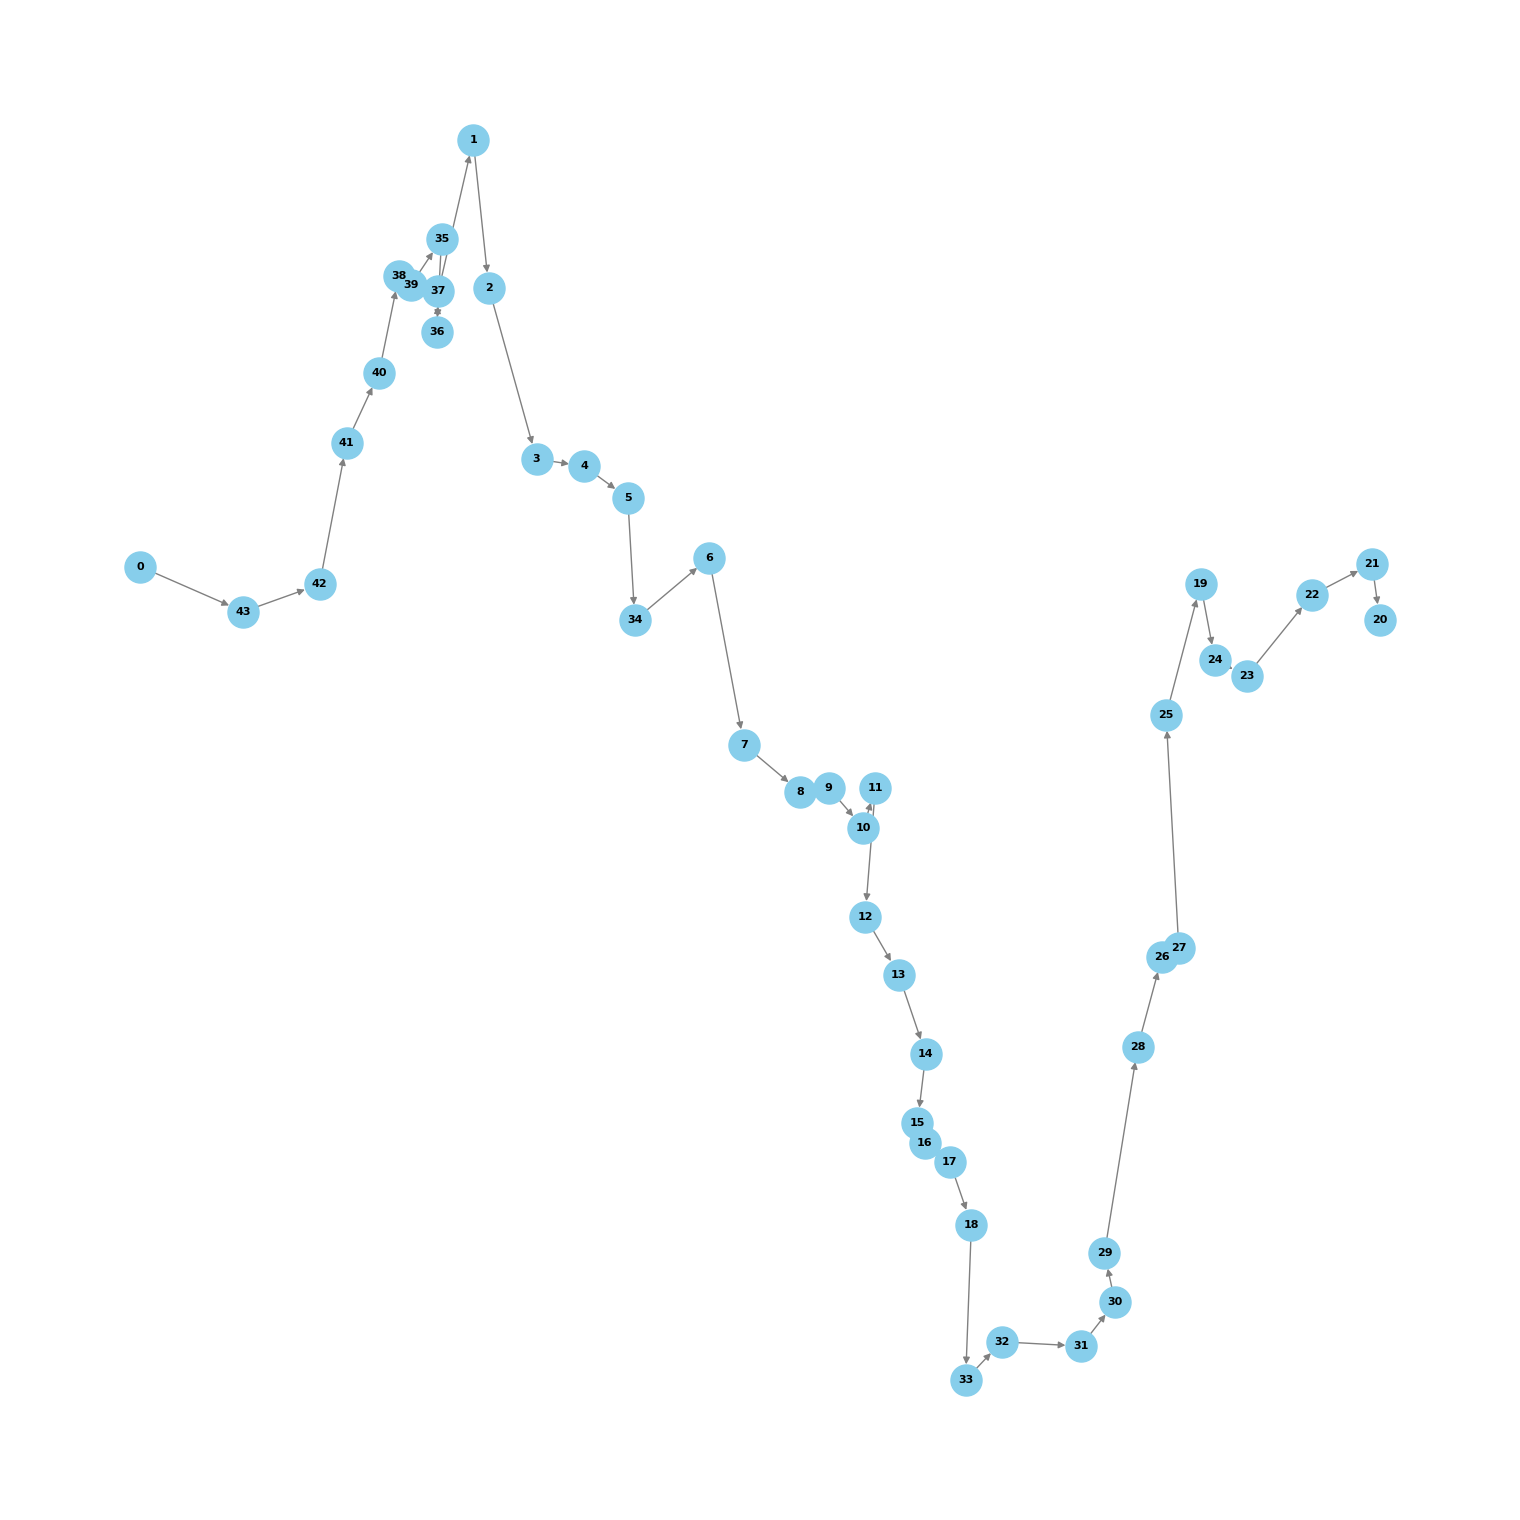

In [ ]:
G = nx.DiGraph()

# Add nodes
G.add_nodes_from(nodes_data.apply(lambda row: (
    row["tourist_dest_id"],
    {"pos": (row["x (longitude)"], row["y (latitude)"]), "label": f"{row['Comune']} - {row['Piazza']}"}
), axis=1).tolist())



# Add edges for the optimal path
G.add_edges_from([(origin, destination, {"distance": distance_matrix[origin][destination]}) for origin, destination in path])

plt.figure(figsize=(15, 15))

# Draw the graph
pos = nx.get_node_attributes(G, "pos")
nx.draw(G, pos, with_labels=True, node_size=500, font_size=8, font_color="black", font_weight="bold",
        node_color="skyblue", edge_color="gray", arrowsize=10)

plt.show()

<ipython-input-7-32db37f75637>:43: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  return np.sum(distance_matrix[ordered_path[i], ordered_path[i+1]] for i in range(index1, index2))


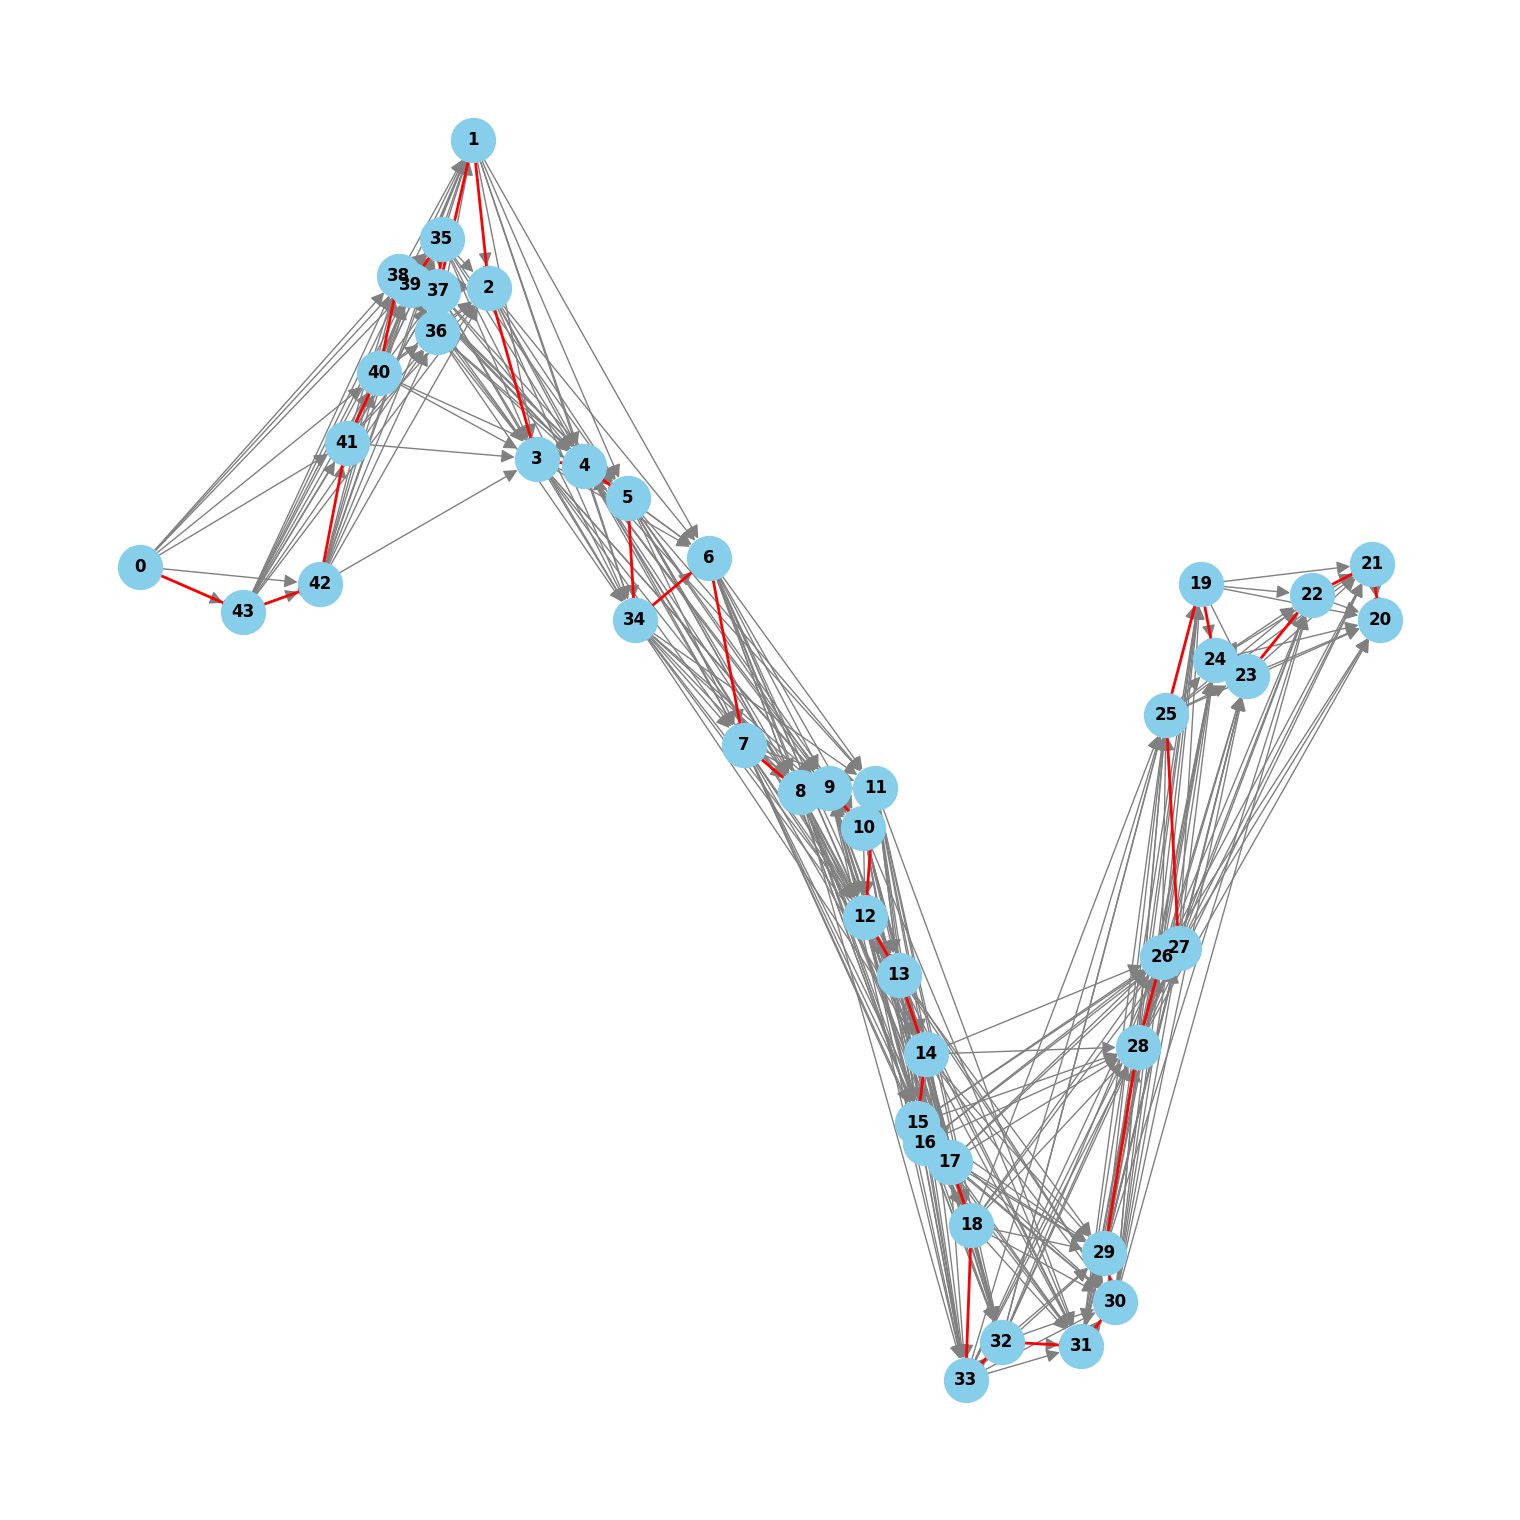

In [ ]:
max_distance = 50_000  # 50,000 meters
valid_arcs_dict = {}

for i, start_node in enumerate(ordered_path):
    accumulated_distance = 0
    for next_node in ordered_path[i + 1:]:
        if(nodes_distance(start_node, next_node, ordered_path, distance_matrix) <= max_distance):
            if not G.has_edge(start_node, next_node):
                G.add_edge(start_node, next_node, distance=accumulated_distance)
            valid_arcs_dict[(start_node, next_node)] = accumulated_distance
        else: break


# Create a list of edges for the original path
original_path_edges = [(ordered_path[i], ordered_path[i + 1]) for i in range(len(ordered_path) - 1)]

# Visualization
plt.figure(figsize=(15, 15))
# Draw the graph with all connections
nx.draw(G, pos, with_labels=True, node_size=1000, font_size=12, font_color="black", font_weight="bold",
        node_color="skyblue", edge_color="gray", arrowsize=20)

# Highlight the original path in red
nx.draw_networkx_edges(G, pos, edgelist=original_path_edges, edge_color='red', width=2)

plt.show()

If you want to reset the graph to its original state, run the cell on top of this one again.

In [ ]:
# Create a 2D array for faster distance lookups
max_id = max(od_data['origin_id'].max(), od_data['destination_id'].max())

print(valid_arcs_dict)
# Create model
m = mip.Model()

# define the variables
# x_i variable for selection of nodes
x = [m.add_var(var_type=mip.BINARY, name=f"x{ordered_path[i]}___{i}") for i in range(n)]
print(f"num x: {len(x)}")

# y_ij variable if we have charging station at point i and at point j
print(ordered_path)


y = [[m.add_var(var_type=mip.BINARY, name=f"y{i}_{j}") for j in range(n)] for i in range(n)]
print(f"num y: {len(y)}")
y_dummy = [[[m.add_var(var_type=mip.BINARY, name=f"y_dummy{l}_{i}_{j}") for j in range(n)] for i in range(n)] for l in range(4)]
print(f"num dummy: {len(y_dummy)}")

#  define the constraints
# 2 constraints that we need put or between them:
# we need 2 dummy which can be anded
# x_i + x_j = 2 iff y_ij = 1
# (x_i + x_j = 2 -> y_ij = 1) and (y_ij = 1 -> x_i + x_j = 2)
# (not(x_i + x_j = 2) or y_ij = 1) and (not(y_ij = 1) or x_i + x_j = 2)
# Budget Constraint
m += mip.xsum(nodes_data.loc[ordered_path[i], 'Cost_of_installation [euro]'] * x[i] for i in range(n)) <= 45000 + nodes_data.loc[first_node, 'Cost_of_installation [euro]'] + nodes_data.loc[last_node, 'Cost_of_installation [euro]']
# Linking constraint
m += x[0] == 1
m += x[-1] == 1
for i in range(n):
    for j in range(n):
        if i != j:
            m += x[i] + x[j] <= 1 + 3 * y_dummy[0][i][j]
            m += y[i][j] - 1 + 3*y_dummy[1][i][j]>= 0
            m += x[i] + x[j] + 3 * y_dummy[2][i][j] >= 2
            m += y[i][j] <= 3 * y_dummy[3][i][j]

            m += y_dummy[0][i][j] + y_dummy[1][i][j] <= 1
            m += y_dummy[2][i][j] + y_dummy[3][i][j] <= 1
            #(Np or q) and (p or Nq)
            #Np or Nq or q or p

# Dummy Variable constraint
z = m.add_var(lb=0.0, var_type=mip.CONTINUOUS, name='max_distance')
# Now, add a constraint to ensure that z is greater than or equal to each d_ij * y_ij
for i in range(n):  # Assuming n is the number of tourist sites
    for j in range(i+1, n):
        m += valid_arcs_dict.get((ordered_path[i], ordered_path[j]), 0) * y[i][j] <= z

    m += mip.xsum(x[l] for l in range(i+1, n) if (ordered_path[i], ordered_path[l]) in valid_arcs_dict) >= 1


# Flow Conservation Constraints
# Flow Conservation Constraints
b = {i: 0 for i in range(n)}
b[first_node] = 1       # Start node (s)
b[last_node] = -1  # Final node (t)

#for i in ordered_path:
#     m += mip.xsum(y[i,j] for j in ordered_path if (i,j) in valid_arcs) -
#                  mip.xsum(y[j,i] for j in ordered_path if (j,i) in valid_arcs) ==
#                  b[i])


# TO DO


# optimize objective function
m.objective = mip.minimize(z)

# TO DO


m.optimize()

{(0, 43): 0, (0, 42): 0, (0, 41): 0, (0, 40): 0, (0, 38): 0, (0, 39): 0, (0, 35): 0, (43, 42): 0, (43, 41): 0, (43, 40): 0, (43, 38): 0, (43, 39): 0, (43, 35): 0, (43, 36): 0, (43, 37): 0, (43, 1): 0, (43, 2): 0, (42, 41): 0, (42, 40): 0, (42, 38): 0, (42, 39): 0, (42, 35): 0, (42, 36): 0, (42, 37): 0, (42, 1): 0, (42, 2): 0, (42, 3): 0, (41, 40): 0, (41, 38): 0, (41, 39): 0, (41, 35): 0, (41, 36): 0, (41, 37): 0, (41, 1): 0, (41, 2): 0, (41, 3): 0, (40, 38): 0, (40, 39): 0, (40, 35): 0, (40, 36): 0, (40, 37): 0, (40, 1): 0, (40, 2): 0, (40, 3): 0, (40, 4): 0, (38, 39): 0, (38, 35): 0, (38, 36): 0, (38, 37): 0, (38, 1): 0, (38, 2): 0, (38, 3): 0, (38, 4): 0, (38, 5): 0, (39, 35): 0, (39, 36): 0, (39, 37): 0, (39, 1): 0, (39, 2): 0, (39, 3): 0, (39, 4): 0, (39, 5): 0, (35, 36): 0, (35, 37): 0, (35, 1): 0, (35, 2): 0, (35, 3): 0, (35, 4): 0, (35, 5): 0, (35, 34): 0, (36, 37): 0, (36, 1): 0, (36, 2): 0, (36, 3): 0, (36, 4): 0, (36, 5): 0, (36, 34): 0, (37, 1): 0, (37, 2): 0, (37, 3): 0, (

<OptimizationStatus.OPTIMAL: 0>

In [ ]:
for i in range(len(m.vars)):
   if m.vars[i].x and "dummy" not in str(m.vars[i]):
      print(m.vars[i], end=", ")
print()
print(m.objective_value)

x0___0, x35___7, x34___15, x9___19, x14___24, x30___32, x27___36, x20___43, y0_7, y0_15, y0_19, y0_24, y0_32, y0_36, y0_43, y7_0, y7_15, y7_19, y7_24, y7_32, y7_36, y7_43, y15_0, y15_7, y15_19, y15_24, y15_32, y15_36, y15_43, y19_0, y19_7, y19_15, y19_24, y19_32, y19_36, y19_43, y24_0, y24_7, y24_15, y24_19, y24_32, y24_36, y24_43, y32_0, y32_7, y32_15, y32_19, y32_24, y32_36, y32_43, y36_0, y36_7, y36_15, y36_19, y36_24, y36_32, y36_43, y43_0, y43_7, y43_15, y43_19, y43_24, y43_32, y43_36, 
0.0


<ipython-input-7-32db37f75637>:43: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  return np.sum(distance_matrix[ordered_path[i], ordered_path[i+1]] for i in range(index1, index2))


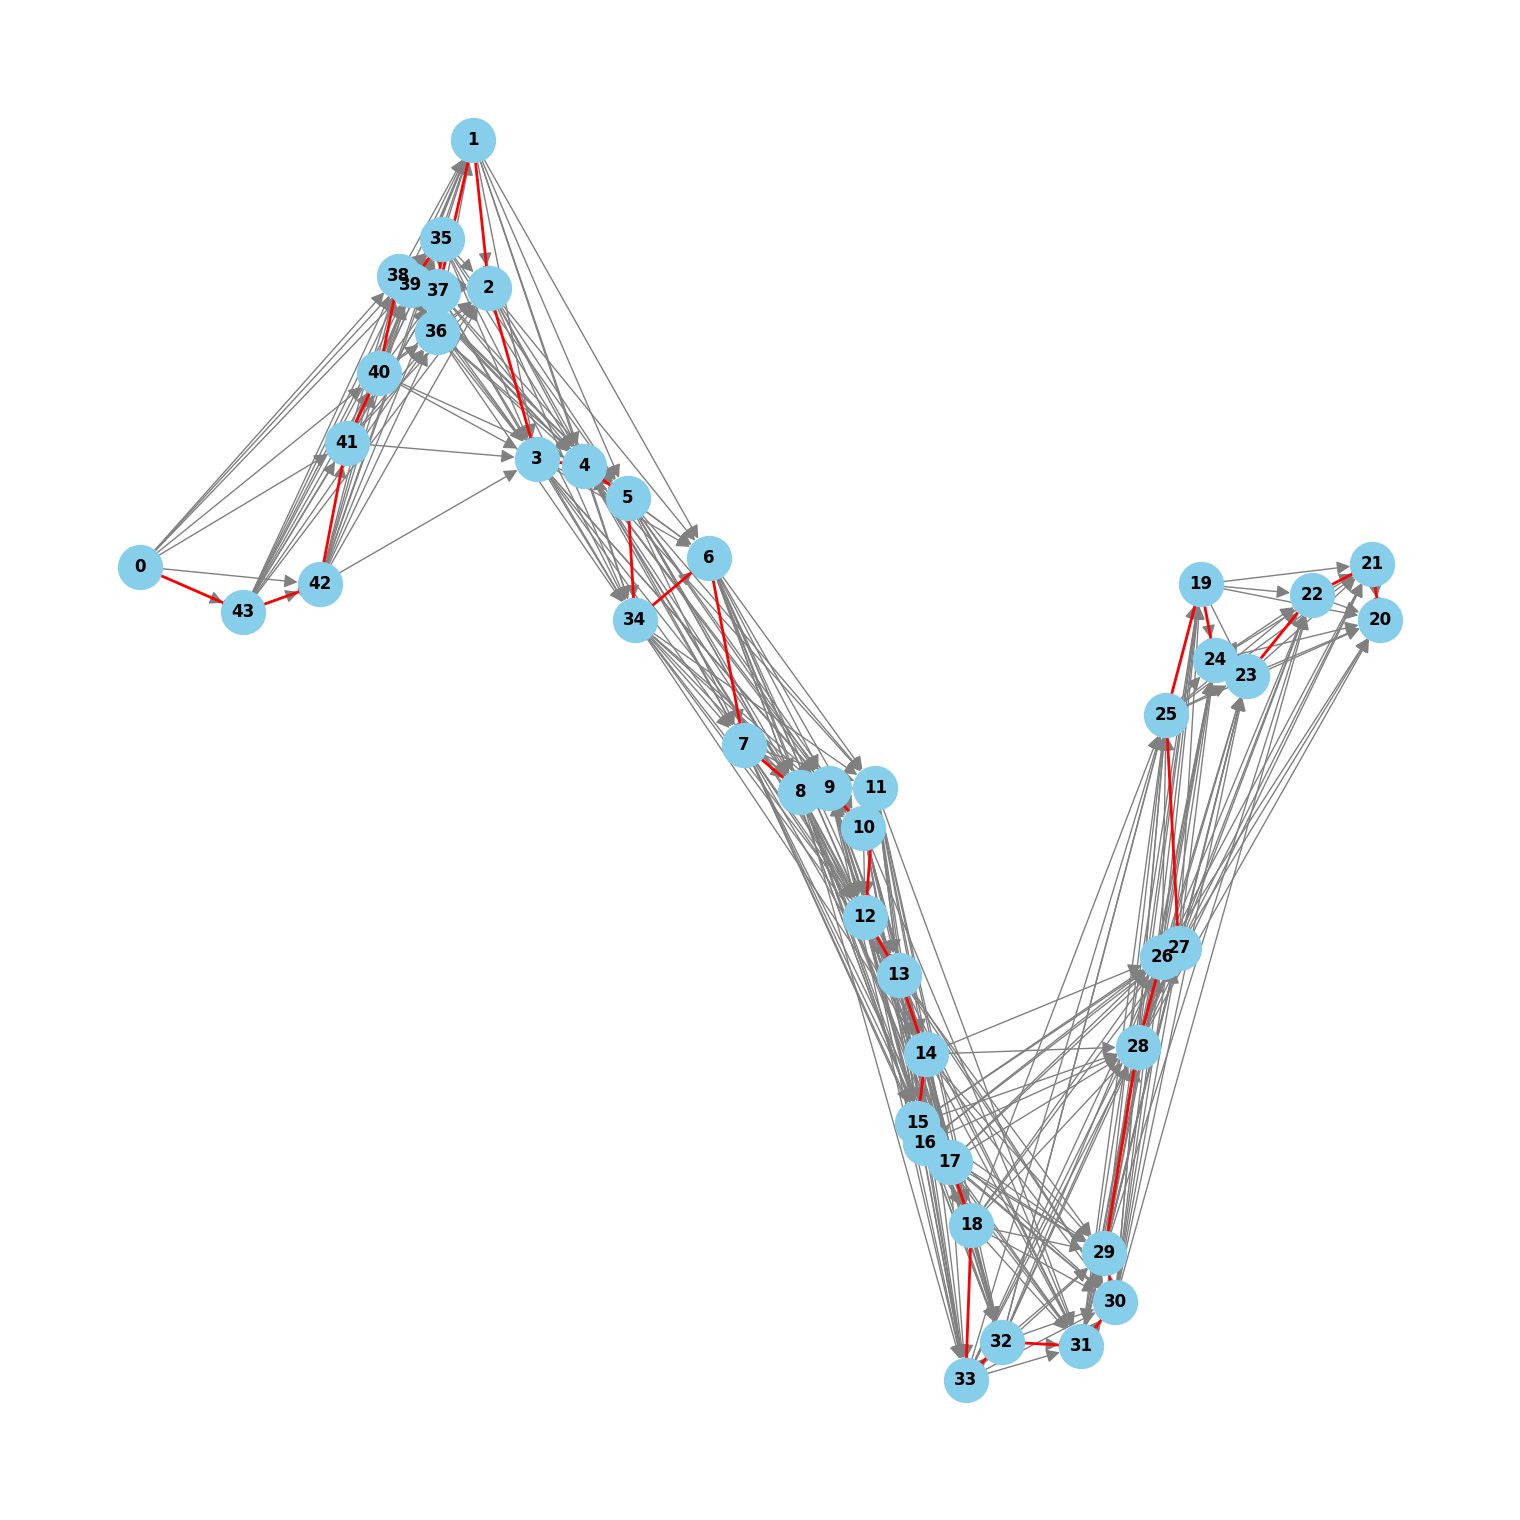

In [ ]:
max_distance = 50_000  # 50,000 meters
valid_arcs_dict = {}
for i, start_node in enumerate(ordered_path):
    accumulated_distance = 0
    for next_node in ordered_path[i + 1:]:
        if(nodes_distance(start_node, next_node, ordered_path, distance_matrix) <= max_distance):
            if not G.has_edge(start_node, next_node):
                G.add_edge(start_node, next_node, distance=accumulated_distance)
            valid_arcs_dict[(start_node, next_node)] = accumulated_distance
        else: break

# Create a list of edges for the original path
original_path_edges = [(ordered_path[i], ordered_path[i + 1]) for i in range(len(ordered_path) - 1)]

# Visualization
plt.figure(figsize=(15, 15))
# Draw the graph with all connections
nx.draw(G, pos, with_labels=True, node_size=1000, font_size=12, font_color="black", font_weight="bold",
        node_color="skyblue", edge_color="gray", arrowsize=20)

# Highlight the original path in red
nx.draw_networkx_edges(G, pos, edgelist=original_path_edges, edge_color='red', width=2)

plt.show()

In [ ]:
# Remove the dummy node and its corresponding row and column
distance_matrix = np.delete(distance_matrix_with_dummy, dummy_node_index, axis=0)
distance_matrix = np.delete(distance_matrix, dummy_node_index, axis=1)

print("\nDistance Matrix without Dummy Node:")
print(distance_matrix)
print(len(distance_matrix))


Distance Matrix without Dummy Node:
[[    0 43798 47252 ... 29952 29218 16011]
 [43798     0  7024 ... 14536 18144 28400]
 [47252  7024     0 ... 17991 21599 31855]
 ...
 [29952 14536 17991 ...     0  4298 14554]
 [29218 18144 21599 ...  4298     0 13821]
 [16011 28400 31855 ... 14554 13821     0]]
44


In [ ]:
od_1 = [0, 43, 42, 41, 40, 38, 39, 37, 36, 35, 1, 2, 3, 4, 5, 34, 6, 7, 8, 9, 11, 10, 12, 13, 15, 14, 16, 17, 18, 33, 32, 31, 29, 30, 28, 26, 27, 25, 19, 24, 23, 22, 21, 20]
# print(f'first node: {first_node}, last node: {last_node}')
# print(ordered_path)
total_dist = 0
for (i, i_) in enumerate(ordered_path):
  if i + 1 != 44:
    total_dist += distance_matrix[i, i+1]

print(total_dist)

NameError: name 'ordered_path' is not defined

In [ ]:
import mip

def find_valid_arcs(op, distance_matrix, max_distance):
    valid_arcs = {}

    for i in range(len(op) - 1):
        for j in range(i + 1, len(op)):
            origin_id_i, destination_id_i = op[i], op[j]

            cumulative_distance = np.sum(distance_matrix[op[i:j], op[i+1:j+1]])

            if cumulative_distance > max_distance:
                break  # Move to the next item
            else:
                valid_arcs[(origin_id_i, destination_id_i)] = cumulative_distance

    return valid_arcs


max_distance = 50_000
valid_arcs = find_valid_arcs(od_1, distance_matrix, max_distance)
print(valid_arcs)

# Create model
m = mip.Model()

# define the variables
# x_i variable for selection of nodes
# x = [m.add_var(var_type=mip.BINARY, name=f"x_{i}") for i in range(n)]
# print(f"number of x: {len(x)}")
# y_ij variable if we have charging station at point i and at point j


y = {(i, j): m.add_var(var_type=mip.BINARY, name=f"y{od_1[i]}_{od_1[j]}___{i}_{j}") for (i, j) in valid_arcs.keys()}

# when building charging stations only in i not j
#
print(f"number of y: {len(y)}")


#  define the constraints
# 1. Budget Constraint
first_node = od_1[0]
last_node = od_1[len(od_1) - 1]

budget = 28_000 + nodes_data.loc[first_node, 'Cost_of_installation [euro]']
# budget = 10_000
print(budget)
m += mip.xsum(nodes_data.loc[i, 'Cost_of_installation [euro]'] * y[i, j] for (i, j) in valid_arcs.keys()) <= budget

# m += mip.xsum(nodes_data.loc[i, 'Cost_of_installation [euro]'] * x[i] for i in nodes_data.index) <= budget

# Linking constraint
# for i in nodes_data.index:
#   for j in nodes_data.index:
#       if (i, j) in valid_arcs.keys():
#         # print("Linking Constraint:", i, j, x[i].name, x[j].name, y[i, j].name)
#         m += y[i, j] <= x[i]
#         m += y[i, j] <= x[j]
#         m += x[i] + x[j] - 1 <= y[i, j]

# Dummy Variable constraint
z = m.add_var(lb=0.0, var_type=mip.CONTINUOUS, name='max_distance')
# Now, add a constraint to ensure that z is greater than or equal to each d_ij * y_ij
for i, j in valid_arcs.keys():
  m += valid_arcs[i, j] - 10**8 * (1 - y[i, j]) <= z
  # m += valid_arcs[i, j] - 10**8 * (1 - x[i]) - 10**8 * (1 - x[j]) <= z


# Flow Conservation Constraints
b = {i: 0 for i in nodes_data.index}
b[first_node] = 1       # Start node (s)
b[last_node] = -1  # Final node (t)
print(b)

for i in nodes_data.index:
     m.add_constr(mip.xsum(y[i,j] for j in nodes_data.index if (i,j) in valid_arcs.keys()) -
                  mip.xsum(y[j,i] for j in nodes_data.index if (j,i) in valid_arcs.keys()) ==
                  b[i])


# optimize objective function
m.objective = mip.minimize(z)


m.optimize()
print(f"objective: {m.objective_value}")
# for i in range(len(x)):
#   if m.vars[i].x > 0.5:
#     print(m.vars[i], m.vars[i].x)

# Extract the values of y_ij after optimization
y_values = {(i, j): y[i, j].x for (i, j) in valid_arcs.keys()}

# Print the values of y_ij
print("Values of y_ij:")
for (i, j), value in y_values.items():
    if value > 0.5:
      print(f"y_{i}_{j}: {value}")


NameError: name 'od_1' is not defined

In [ ]:
# Function to get distance between two nodes from the distance matrix
def get_distance(node1, node2):
    return distance_matrix[node1, node2]

# Calculate distances between each pair of nodes
distances = {}

for i in range(len(ordered_path) - 1):
    node1 = ordered_path[i]
    node2 = ordered_path[i + 1]
    distances[(node1, node2)] = get_distance(node1, node2)

max_value = 0
# Print distances
for (node1, node2), distance in distances.items():
  if max_value < distance:
    max_value = distance


print(max_value)

16011.18979


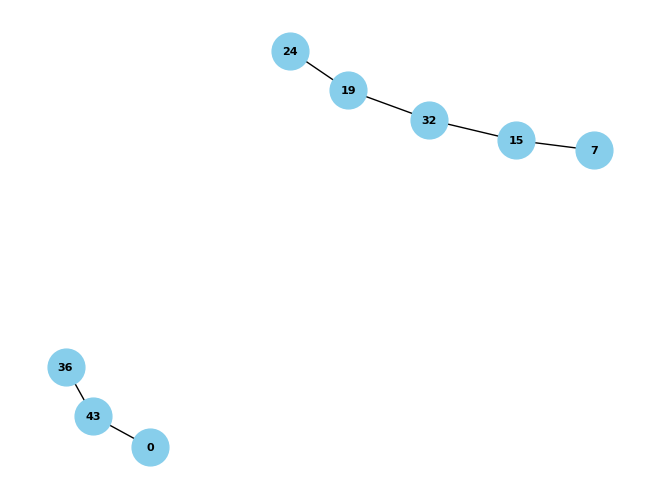

{(0, 43): 16011.18979, (0, 42): 29832.45227, (0, 41): 34130.609288, (0, 40): 39610.193432, (0, 38): 43246.561147, (0, 39): 44815.590338, (0, 35): 49574.269353, (43, 42): 13821.26248, (43, 41): 18119.419498, (43, 40): 23599.003642, (43, 38): 27235.371357, (43, 39): 28804.400548, (43, 35): 33563.079563, (43, 36): 35805.933658, (43, 37): 36795.4581417, (43, 1): 42846.9603267, (43, 2): 49871.7452367, (42, 41): 4298.157018, (42, 40): 9777.741162, (42, 38): 13414.108877, (42, 39): 14983.138068, (42, 35): 19741.817083, (42, 36): 21984.671178, (42, 37): 22974.1956617, (42, 1): 29025.6978467, (42, 2): 36050.4827567, (42, 3): 48238.99729670001, (41, 40): 5479.584144, (41, 38): 9115.951859, (41, 39): 10684.98105, (41, 35): 15443.660065, (41, 36): 17686.51416, (41, 37): 18676.038643699998, (41, 1): 24727.5408287, (41, 2): 31752.325738699998, (41, 3): 43940.840278699994, (40, 38): 3636.367715, (40, 39): 5205.396906, (40, 35): 9964.075921, (40, 36): 12206.930016, (40, 37): 13196.454499700001, (40, 1

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Assuming nodes are represented by binary variables x[i] in your model
selected_nodes = [i for i in range(len(x)) if x[i].x >= 0.99]

# Create a graph
G = nx.Graph()

# Add selected nodes to the graph
G.add_nodes_from(selected_nodes)

# Iterate over valid arcs and add edges to the graph
for i, j in valid_arcs.keys():
    if i in selected_nodes and j in selected_nodes:
        G.add_edge(i, j)

# Draw the graph
pos = nx.spring_layout(G)  # You can use different layout algorithms
nx.draw(G, pos, with_labels=True, font_weight='bold', node_color='skyblue', node_size=700, font_size=8)
plt.show()


print(valid_arcs)
c = [nodes_data.loc[i, 'Cost_of_installation [euro]'] for i in selected_nodes]
t = 0
for i in c:
  t += i
print(t)

print(f"distance 42 to 1 {valid_arcs[42, 1]}")
sum_cost = 0
for i in nodes_data.index:
  sum_cost +=  nodes_data.loc[i, 'Cost_of_installation [euro]']

print(sum_cost)

print(distance_matrix[42, 41] + distance_matrix[41, 40] +
      distance_matrix[40, 38] + distance_matrix[38, 39] +
      distance_matrix[39, 35] + distance_matrix[35, 36] +
      distance_matrix[36, 37] + distance_matrix[37, 1])
print(distance_matrix)
# print(distance_matrix[42 -> 41 -> 40 -> 38 -> 39 -> 35 -> 36 -> 37 -> 1])

In [ ]:
import mip
import numpy as np

def mip_function(variables_values):
    # Unpack the variables_values
    max_distance, budget = variables_values

    # Your existing code here...
    valid_arcs = find_valid_arcs(od_1, distance_matrix, max_distance)

    # Create model
    m = mip.Model()

    # define the variables
    y = {(i, j): m.add_var(var_type=mip.BINARY, name=f"y{od_1[i]}_{od_1[j]}___{i}_{j}") for (i, j) in valid_arcs.keys()}

    # define the constraints
    first_node = od_1[0]
    last_node = od_1[len(od_1) - 1]

    m += mip.xsum(nodes_data.loc[i, 'Cost_of_installation [euro]'] * y[i, j] for (i, j) in valid_arcs.keys()) <= budget

    # Dummy Variable constraint
    z = m.add_var(lb=0.0, var_type=mip.CONTINUOUS, name='max_distance')
    for i, j in valid_arcs.keys():
        m += valid_arcs[i, j] - 10**8 * (1 - y[i, j]) <= z

    # Flow Conservation Constraints
    b = {i: 0 for i in nodes_data.index}
    b[first_node] = 1       # Start node (s)
    b[last_node] = -1  # Final node (t)

    for i in nodes_data.index:
        m.add_constr(mip.xsum(y[i,j] for j in nodes_data.index if (i,j) in valid_arcs.keys()) -
                    mip.xsum(y[j,i] for j in nodes_data.index if (j,i) in valid_arcs.keys()) ==
                    b[i])

    # optimize objective function
    m.objective = mip.minimize(z)
    m.optimize()

    # Return the objective function value of the solved model
    return m.objective_value


In [ ]:
from pyMetaheuristic.algorithm import  sine_cosine_algorithm

# SCA - Parameters
parameters = {
    'solutions': 150,
    'min_values': (-5, -5),
    'max_values': (5, 5),
    'iterations': 500,
    'a_linear_component': 2,
	  'verbose': True,
	  'start_init': None,
	  'target_value': None
}

sca = sine_cosine_algorithm(target_function = mip_function, **parameters)

Iteration =  0  f(x) =  0.0
Iteration =  1  f(x) =  0.0
Iteration =  2  f(x) =  0.0
Iteration =  3  f(x) =  0.0
Iteration =  4  f(x) =  0.0
Iteration =  5  f(x) =  0.0
Iteration =  6  f(x) =  0.0
Iteration =  7  f(x) =  0.0
Iteration =  8  f(x) =  0.0
Iteration =  9  f(x) =  0.0
Iteration =  10  f(x) =  0.0
Iteration =  11  f(x) =  0.0
Iteration =  12  f(x) =  0.0
Iteration =  13  f(x) =  0.0
Iteration =  14  f(x) =  0.0
Iteration =  15  f(x) =  0.0
Iteration =  16  f(x) =  0.0
Iteration =  17  f(x) =  0.0
Iteration =  18  f(x) =  0.0
Iteration =  19  f(x) =  0.0
Iteration =  20  f(x) =  0.0
Iteration =  21  f(x) =  0.0
Iteration =  22  f(x) =  0.0
Iteration =  23  f(x) =  0.0
Iteration =  24  f(x) =  0.0
Iteration =  25  f(x) =  0.0
Iteration =  26  f(x) =  0.0
Iteration =  27  f(x) =  0.0
Iteration =  28  f(x) =  0.0
Iteration =  29  f(x) =  0.0
Iteration =  30  f(x) =  0.0
Iteration =  31  f(x) =  0.0
Iteration =  32  f(x) =  0.0
Iteration =  33  f(x) =  0.0
Iteration =  34  f(x) = 